<a href="https://colab.research.google.com/github/joshuataeyong/-AI-/blob/master/JMS_extension_MLR_XAI4_220520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

In [ ]:
import numpy as np
import pandas as pd
# import pylab as plt

In [ ]:
data = 'https://raw.githubusercontent.com/joshuataeyong/JMS_Extension/main/Data_cycle28_update.csv'
df_x = pd.read_csv(data, sep=",", header=0) 

df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cycle         122 non-null    int64  
 1   TMP           122 non-null    float64
 2   Kb            122 non-null    float64
 3   Ki            122 non-null    float64
 4   Kc            122 non-null    float64
 5   Ks            122 non-null    float64
 6   y_pred        121 non-null    float64
 7   COD           122 non-null    float64
 8   TN            122 non-null    float64
 9   SS            122 non-null    float64
 10  del_TMP       122 non-null    float64
 11  del_TMP_accu  122 non-null    float64
 12  slope         122 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 12.5 KB


In [ ]:
df_x.head()

Cycle       TMP            Kb           Ki            Kc            Ks  \
0     28  7.714506  0.000000e+00     0.000000  0.000000e+00  2.539540e+00   
1     28  7.743266  2.150000e-08   529.635845  4.320790e-04  2.026410e-04   
2     28  7.873816  7.810000e-08  2092.434905  1.420000e-08  1.180000e-08   
3     28  7.461022 -1.590000e-08    -0.029619 -1.382392e-02  5.148340e-04   
4     28  7.200864 -1.430000e-07 -1679.369972 -2.806010e-04  8.190000e-05   

     y_pred         COD      TN          SS   del_TMP  del_TMP_accu     slope  
0       NaN  111.280000  49.012  175.560000  0.000000      0.000000  0.000000  
1  7.743309  112.600000  49.296  177.560000  0.028759      0.028759  0.014380  
2  7.878621  111.540000  49.190  174.006667  0.130550      0.159309  0.053103  
3  7.605171  109.486667  48.826  169.786667 -0.412794     -0.253485 -0.063371  
4  7.344172  107.206667  48.880  169.560000 -0.260158     -0.513643 -0.102729

In [ ]:
df_x.y_pred[0] = df_x.TMP[0] 
df_x.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Cycle       TMP            Kb           Ki            Kc            Ks  \
0     28  7.714506  0.000000e+00     0.000000  0.000000e+00  2.539540e+00   
1     28  7.743266  2.150000e-08   529.635845  4.320790e-04  2.026410e-04   
2     28  7.873816  7.810000e-08  2092.434905  1.420000e-08  1.180000e-08   
3     28  7.461022 -1.590000e-08    -0.029619 -1.382392e-02  5.148340e-04   
4     28  7.200864 -1.430000e-07 -1679.369972 -2.806010e-04  8.190000e-05   

     y_pred         COD      TN          SS   del_TMP  del_TMP_accu     slope  
0  7.714506  111.280000  49.012  175.560000  0.000000      0.000000  0.000000  
1  7.743309  112.600000  49.296  177.560000  0.028759      0.028759  0.014380  
2  7.878621  111.540000  49.190  174.006667  0.130550      0.159309  0.053103  
3  7.605171  109.486667  48.826  169.786667 -0.412794     -0.253485 -0.063371  
4  7.344172  107.206667  48.880  169.560000 -0.260158     -0.513643 -0.102729

In [ ]:
new_df = df_x.drop(['Cycle'], axis=1)
# new_df['TMP'] = df_x.TMP
new_df.head()

TMP            Kb           Ki            Kc            Ks    y_pred  \
0  7.714506  0.000000e+00     0.000000  0.000000e+00  2.539540e+00  7.714506   
1  7.743266  2.150000e-08   529.635845  4.320790e-04  2.026410e-04  7.743309   
2  7.873816  7.810000e-08  2092.434905  1.420000e-08  1.180000e-08  7.878621   
3  7.461022 -1.590000e-08    -0.029619 -1.382392e-02  5.148340e-04  7.605171   
4  7.200864 -1.430000e-07 -1679.369972 -2.806010e-04  8.190000e-05  7.344172   

          COD      TN          SS   del_TMP  del_TMP_accu     slope  
0  111.280000  49.012  175.560000  0.000000      0.000000  0.000000  
1  112.600000  49.296  177.560000  0.028759      0.028759  0.014380  
2  111.540000  49.190  174.006667  0.130550      0.159309  0.053103  
3  109.486667  48.826  169.786667 -0.412794     -0.253485 -0.063371  
4  107.206667  48.880  169.560000 -0.260158     -0.513643 -0.102729

In [ ]:
new_df2 = new_df.drop(['y_pred'], axis=1)
new_df2.head()

TMP            Kb           Ki            Kc            Ks  \
0  7.714506  0.000000e+00     0.000000  0.000000e+00  2.539540e+00   
1  7.743266  2.150000e-08   529.635845  4.320790e-04  2.026410e-04   
2  7.873816  7.810000e-08  2092.434905  1.420000e-08  1.180000e-08   
3  7.461022 -1.590000e-08    -0.029619 -1.382392e-02  5.148340e-04   
4  7.200864 -1.430000e-07 -1679.369972 -2.806010e-04  8.190000e-05   

          COD      TN          SS   del_TMP  del_TMP_accu     slope  
0  111.280000  49.012  175.560000  0.000000      0.000000  0.000000  
1  112.600000  49.296  177.560000  0.028759      0.028759  0.014380  
2  111.540000  49.190  174.006667  0.130550      0.159309  0.053103  
3  109.486667  48.826  169.786667 -0.412794     -0.253485 -0.063371  
4  107.206667  48.880  169.560000 -0.260158     -0.513643 -0.102729

In [ ]:
import sklearn 

X = new_df2[['Kb','Ki','Kc','Ks','COD','TN','SS','del_TMP','del_TMP_accu','slope']]
y = new_df2[['TMP']]

X100 = sklearn.utils.shuffle(X)[0:100]
X100

Kb           Ki            Kc            Ks         COD  \
111  1.200000e-08   359.822374  3.370000e-09  5.392707e-03  107.766667   
72   7.820000e-09   215.072313  1.865010e-03  4.871940e-04  116.386667   
86   2.100000e-08   223.853239  6.420000e-09  0.000000e+00  115.180000   
38   6.570000e-09   220.451680  2.580000e-07  7.690000e-08  117.466667   
61   7.090000e-09   247.700637  1.168360e-04  2.522847e-03  124.806667   
..            ...          ...           ...           ...         ...   
48   2.490000e-09   179.060050  4.550000e-09  4.721917e-03  120.566667   
30  -5.980000e-10  -157.297931 -1.453239e-03  3.245107e-03  112.220000   
118  4.200000e-08  5247.059677  4.690000e-09  1.250000e-08  108.753333   
82   1.700000e-09   240.626827  2.269720e-03  1.142672e-03  116.480000   
0    0.000000e+00     0.000000  0.000000e+00  2.539540e+00  111.280000   

         TN          SS   del_TMP  del_TMP_accu     slope  
111  48.880  212.440000  0.644765      9.196935  0.082115  
72   50.418  226.880000 -0.414188      0.564440  0.007732  
86   49.588  206.666667  0.273366      1.446926  0.016631  
38   54.712  205.773333  0.270902      0.213370  0.005471  
61   54.570  227.333333 -0.223075      0.362396  0.005845  
..      ...         ...       ...           ...       ...  
48   55.360  217.780000 -0.296836      0.577688  0.011790  
30   55.082  198.213333 -0.181502     -0.173188 -0.005587  
118  47.832  206.673333  0.783045     14.578644  0.122510  
82   47.582  208.446667  0.433403      1.271954  0.015325  
0    49.012  175.560000  0.000000      0.000000  0.000000  

[100 rows x 10 columns]

In [ ]:
len(X)

122

In [ ]:
X.iloc[0:121,:]

Kb           Ki            Kc            Ks         COD  \
0    0.000000e+00     0.000000  0.000000e+00  2.539540e+00  111.280000   
1    2.150000e-08   529.635845  4.320790e-04  2.026410e-04  112.600000   
2    7.810000e-08  2092.434905  1.420000e-08  1.180000e-08  111.540000   
3   -1.590000e-08    -0.029619 -1.382392e-02  5.148340e-04  109.486667   
4   -1.430000e-07 -1679.369972 -2.806010e-04  8.190000e-05  107.206667   
..            ...          ...           ...           ...         ...   
116  4.200000e-08   360.007879  7.630000e-09  2.996225e-03  109.826667   
117  5.740000e-08  1481.554599  7.960000e-09  1.310000e-08  109.020000   
118  4.200000e-08  5247.059677  4.690000e-09  1.250000e-08  108.753333   
119  1.220000e-08  3153.310664  1.190000e-08  7.145048e-03  104.906667   
120  5.570000e-09   817.161848  8.560000e-09  9.047860e-03  103.226667   

         TN          SS   del_TMP  del_TMP_accu     slope  
0    49.012  175.560000  0.000000      0.000000  0.000000  
1    49.296  177.560000  0.028759      0.028759  0.014380  
2    49.190  174.006667  0.130550      0.159309  0.053103  
3    48.826  169.786667 -0.412794     -0.253485 -0.063371  
4    48.880  169.560000 -0.260158     -0.513643 -0.102729  
..      ...         ...       ...           ...       ...  
116  47.584  209.120000  0.728641     12.359217  0.105634  
117  47.840  207.340000  1.436382     13.795599  0.116912  
118  47.832  206.673333  0.783045     14.578644  0.122510  
119  47.610  198.673333  0.521402     15.100046  0.125834  
120  45.790  194.006667  0.146052     15.246099  0.126001  

[121 rows x 10 columns]

In [ ]:
y.iloc[121]

TMP    22.990401
Name: 121, dtype: float64

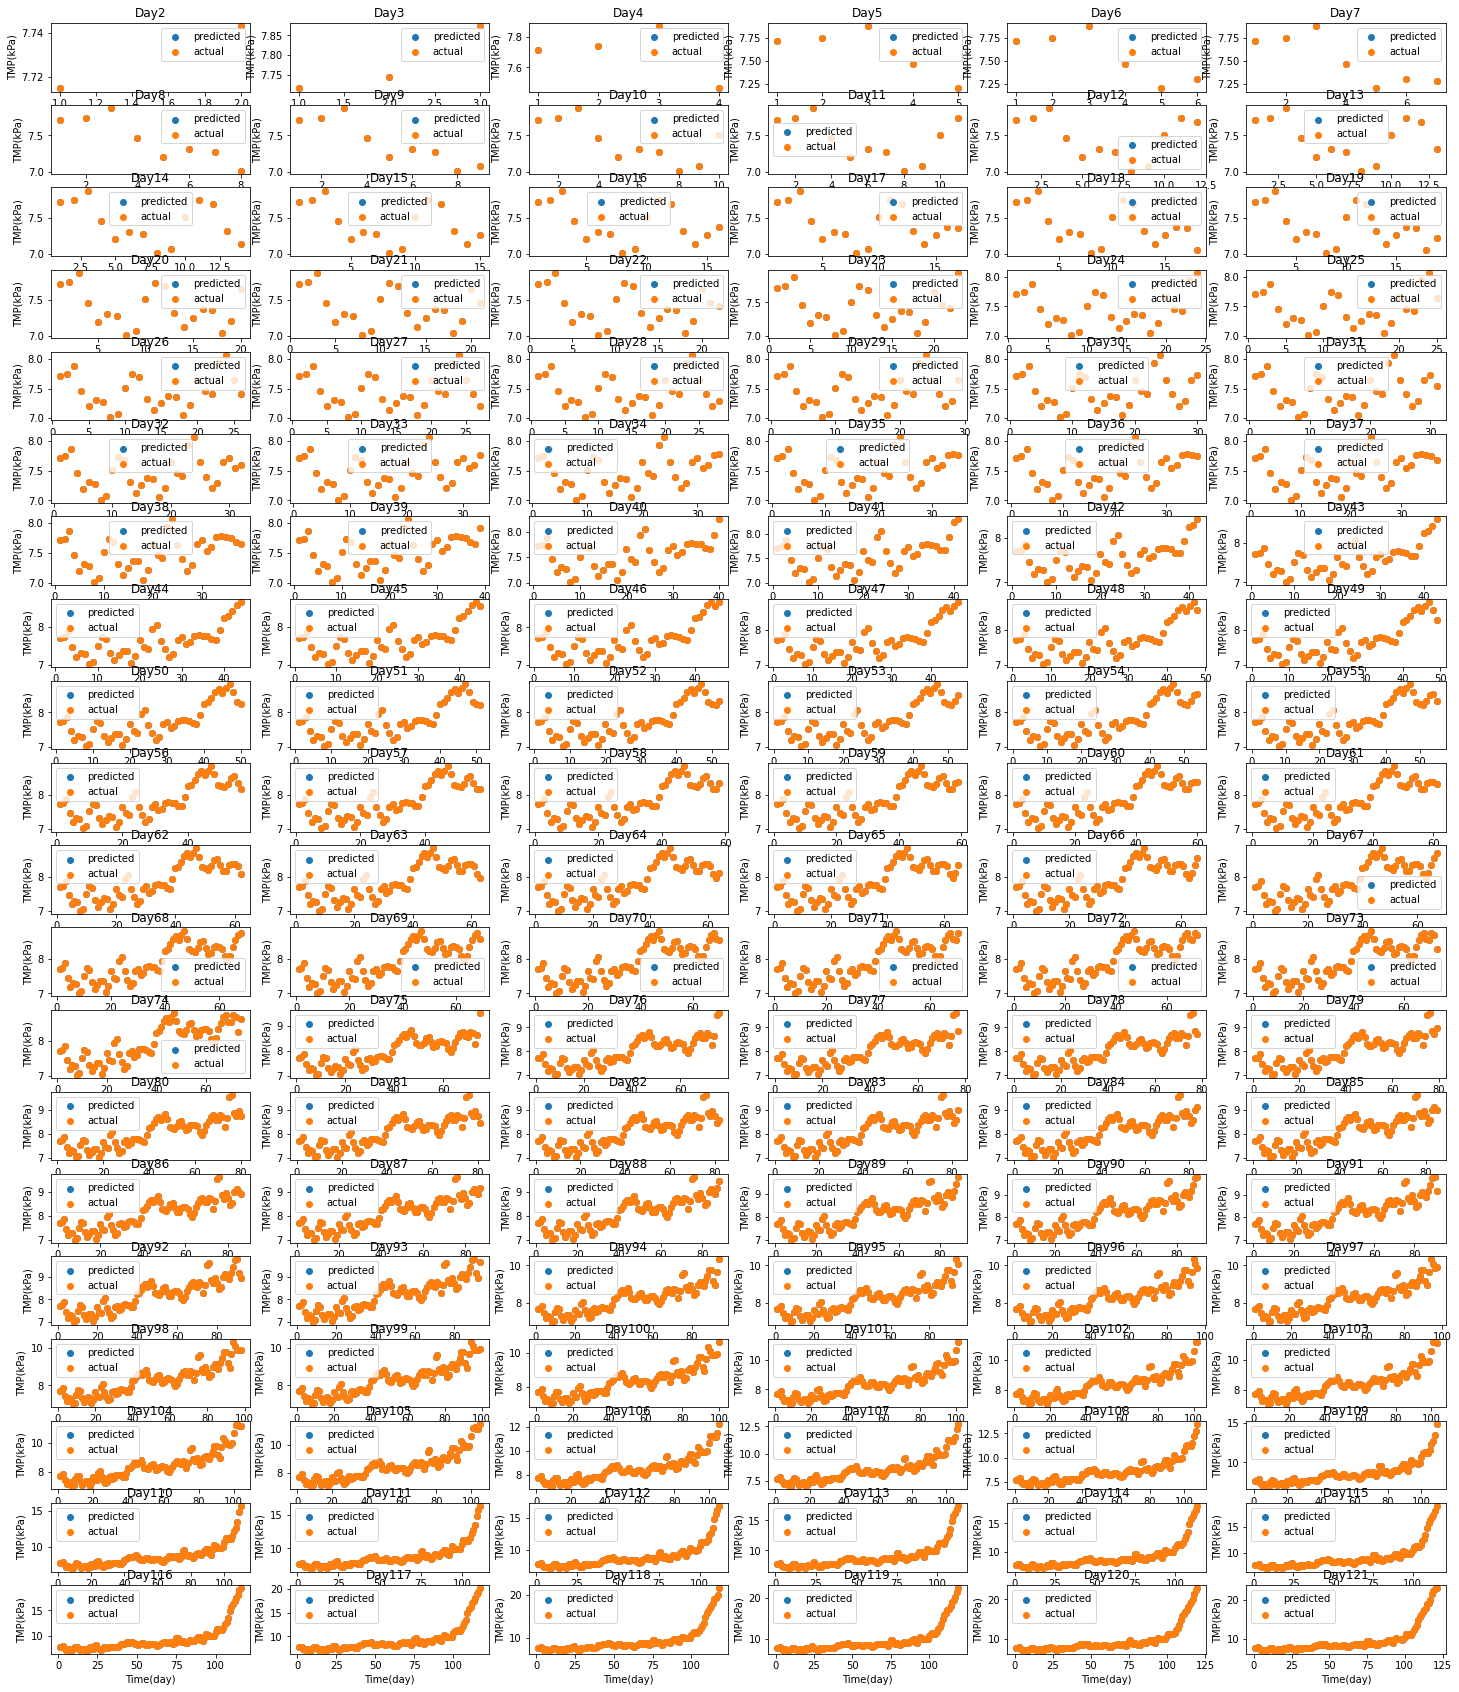

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# a simple linear model
model = sklearn.linear_model.LinearRegression()

target_range = len(X)

plt.figure(figsize=(25,30))
for i in range(2, target_range):
  target_X = X.iloc[0:i,:]
  target_y = y.iloc[0:i]
  fitting = model.fit(target_X, target_y)
  y_pred = model.predict(target_X)
  # print(i, y_pred)
  # plt.figure()
  plt.subplot(20,6,i-1)
  plt.scatter(range(1,len(y_pred)+1), y_pred, label = 'predicted')
  plt.scatter(range(1,len(y_pred)+1), target_y, label = 'actual')
  plt.xlabel('Time(day)')
  plt.ylabel('TMP(kPa)')
  plt.title('Day'+str(i))
  plt.legend()

plt.show()

In [ ]:
# fix for waterfall shap plots
import inspect
import shap.plots._waterfall
source = inspect.getsource(shap.plots._waterfall)
new_source = source.replace("as pl", "as plt")
exec(new_source, shap.plots._waterfall.__dict__)

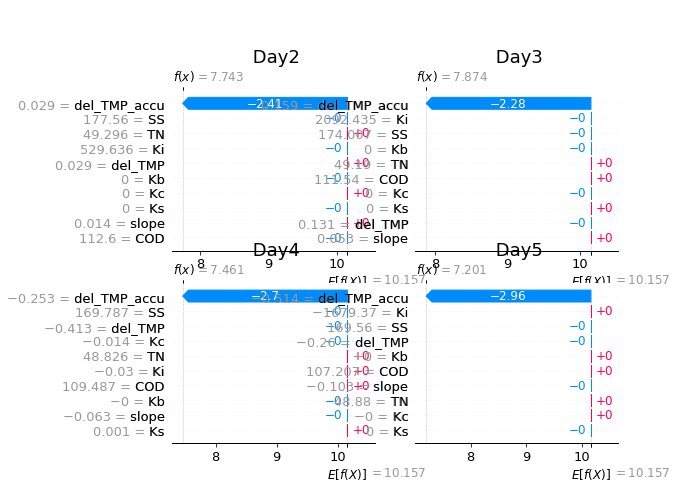

In [ ]:
import shap

# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)

target_range = 6 #len(X)

sample_ind = 1

# plt.figure(figsize=(35,50))
for i in range(2, target_range):
  target_X = X.iloc[0:i,:]
  target_y = y.iloc[0:i]
  shap_values = explainer(target_X)
  shap_val_waterfall = shap_values[sample_ind]
  shap_val_waterfall.base_values =shap_val_waterfall.base_values[0]
  
  if sample_ind <= 18:
    sample_ind +=1

  plt.subplot(2,2,i-1)
  plt.title('\n\n Day'+str(i), fontsize=18)
  shap.plots.waterfall(shap_val_waterfall, max_display=10, show=False)


plt.show()

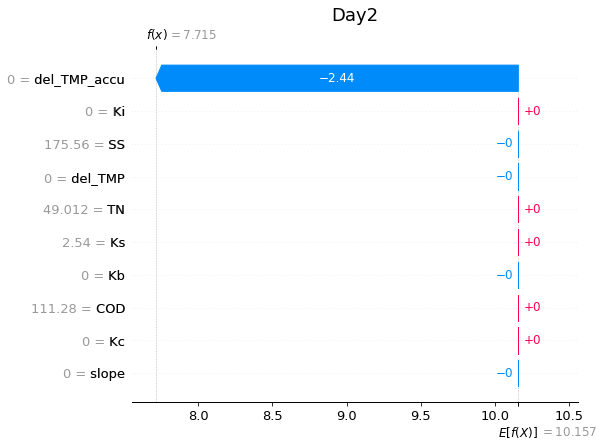

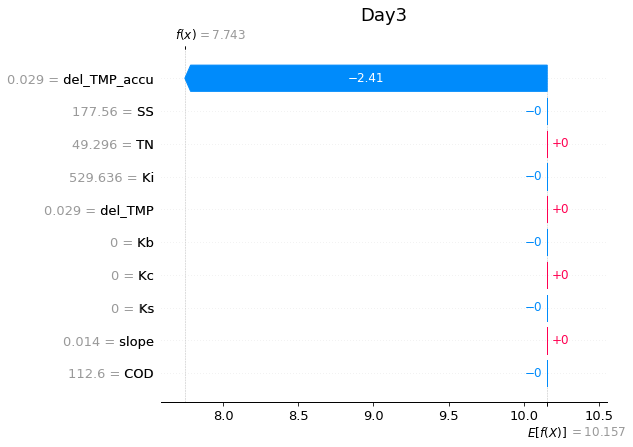

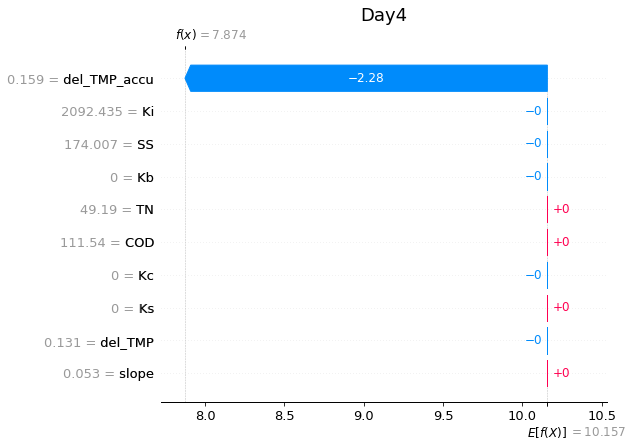

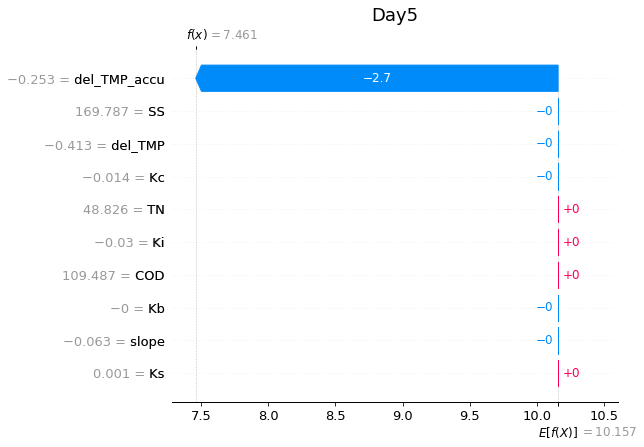

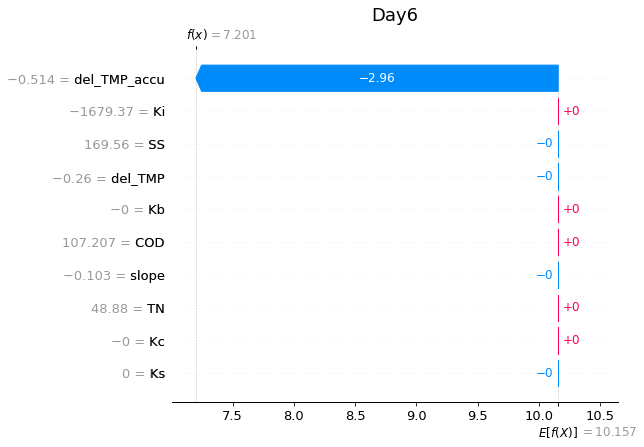

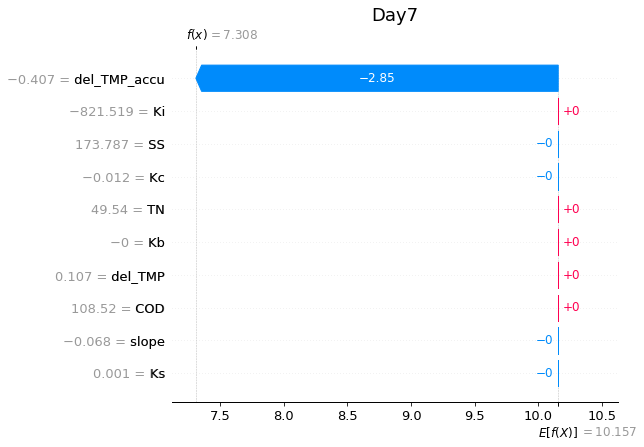

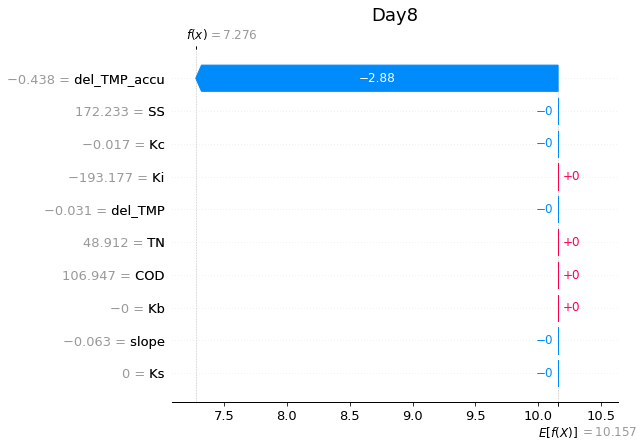

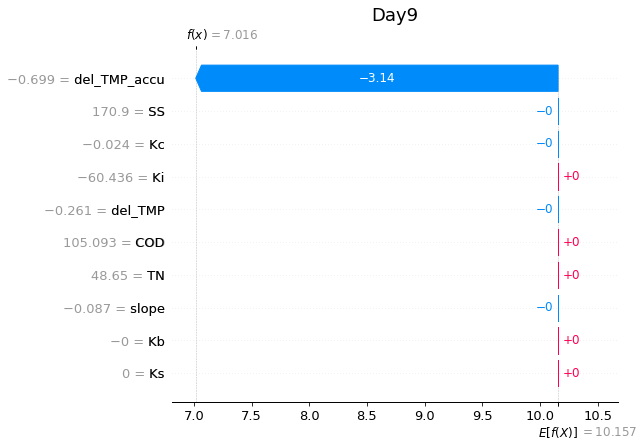

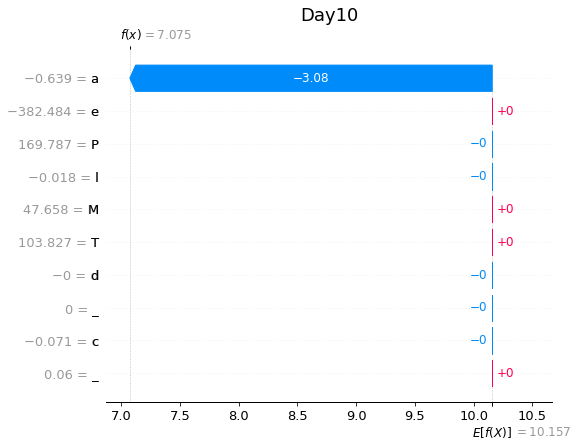

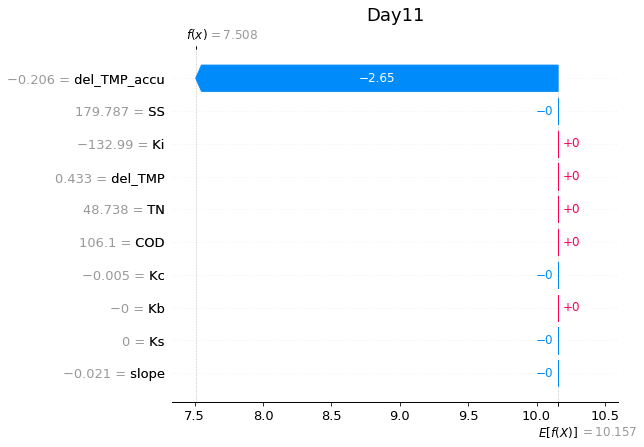

In [ ]:
import shap

# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
# shap_values = explainer(X)

target_range = 12 #len(X)
sample_ind = 0

for i in range(2, target_range):
  target_X = X.iloc[0:i,:]
  target_y = y.iloc[0:i]
  shap_values = explainer(target_X)
  shap_val_waterfall = shap_values[sample_ind]
  shap_val_waterfall.base_values =shap_val_waterfall.base_values[0]
  
  if sample_ind <= 18:
    sample_ind +=1

  plt.title('Day'+str(i), fontsize=18)
  shap.plots.waterfall(shap_val_waterfall, max_display=10, show=True)

  # plot_range = [10, 20, 30]
  
  # if i in plot_range:
  #   plt.title('Day'+str(i), fontsize=18)
  #   shap.plots.waterfall(shap_val_waterfall, max_display=10, show=True)

plt.show()

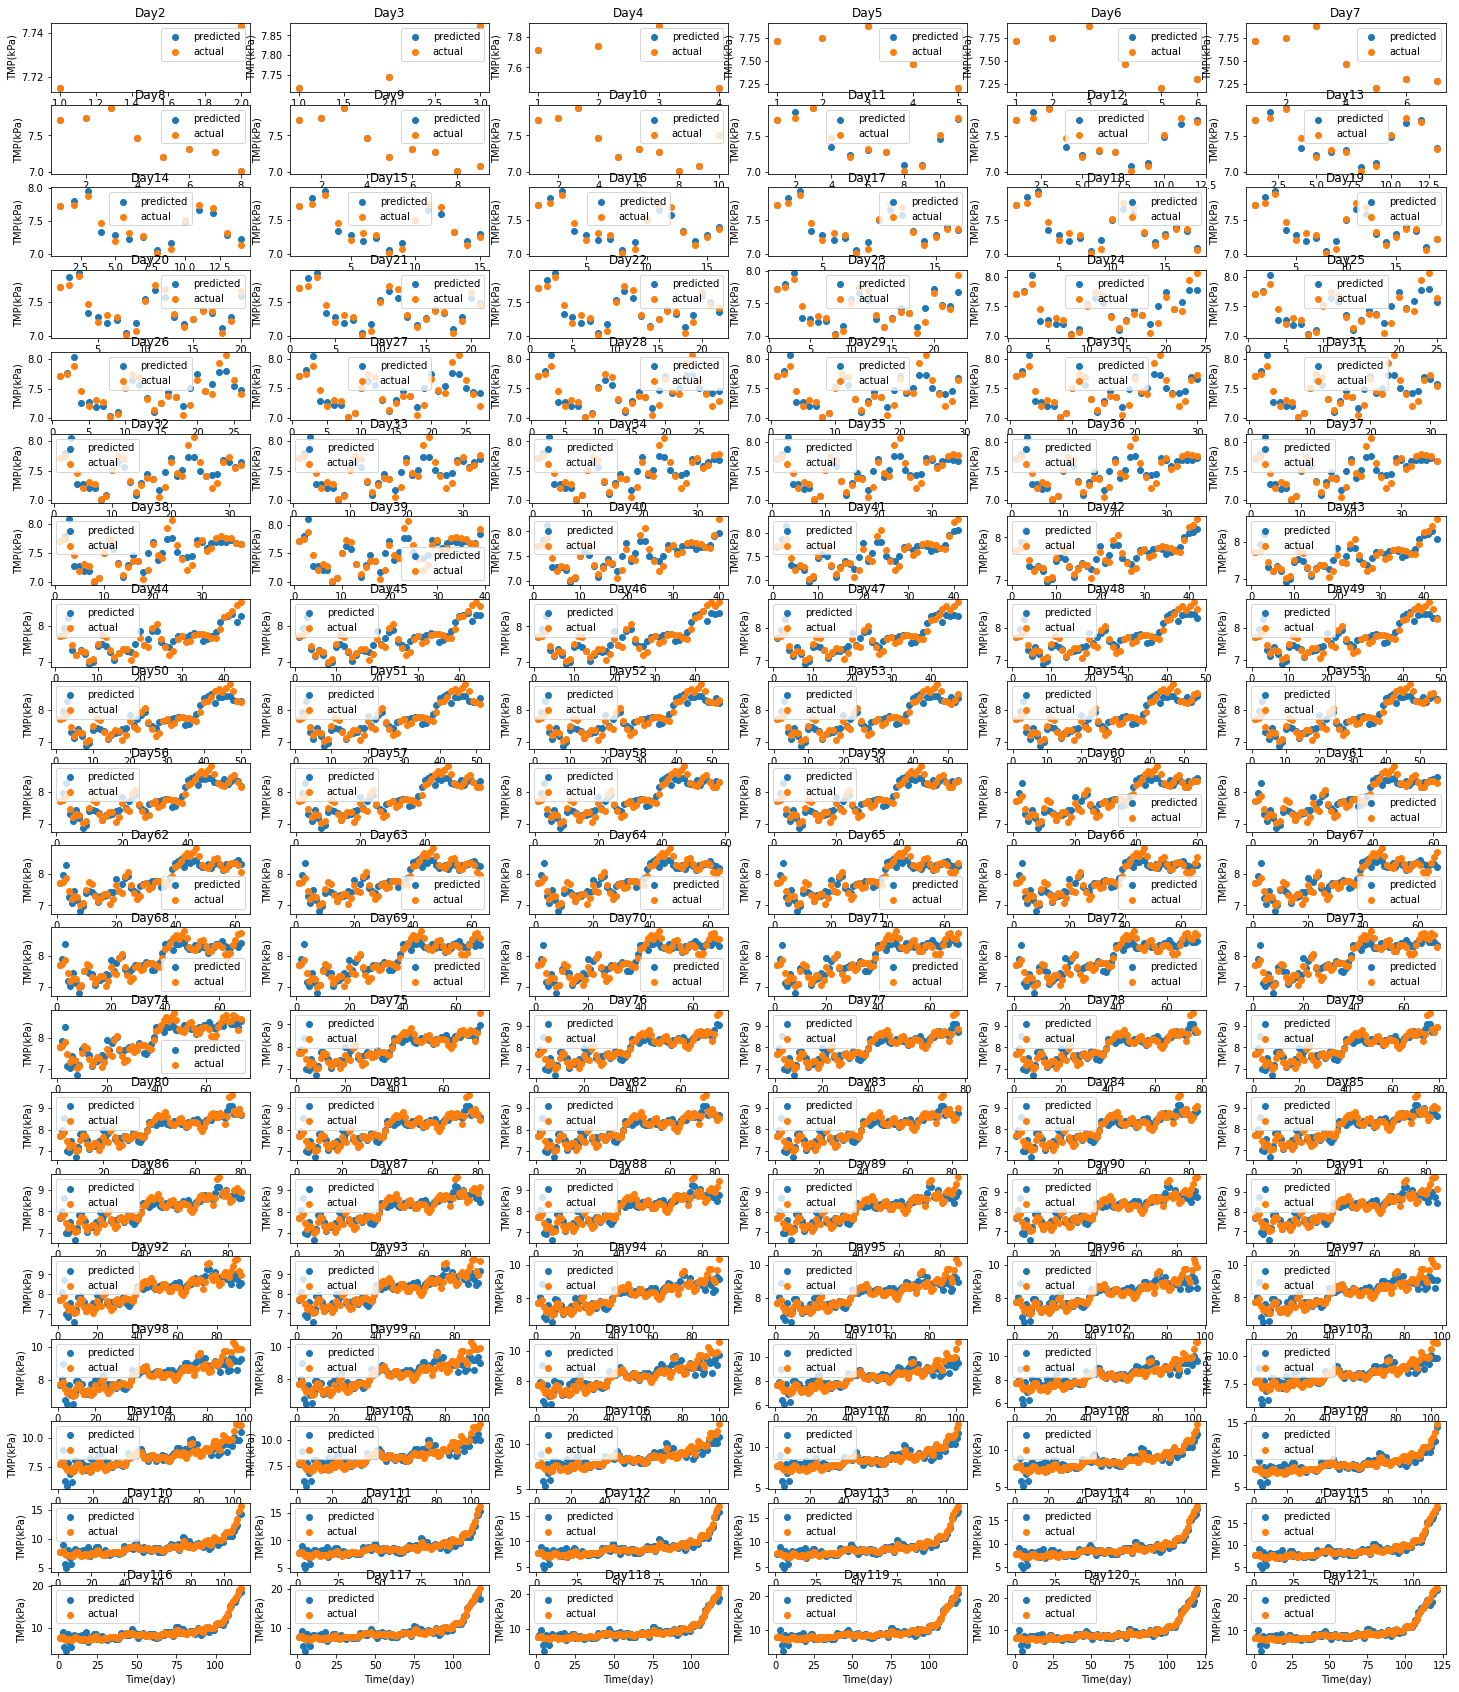

In [ ]:
X = new_df2[['Kb','Ki','Kc','Ks','COD','TN','SS','del_TMP','slope']]
y = new_df2[['TMP']]

X100 = sklearn.utils.shuffle(X)[0:100]

# a simple linear model
model = sklearn.linear_model.LinearRegression()

target_range = len(X)

plt.figure(figsize=(25,30))
for i in range(2, target_range):
  target_X = X.iloc[0:i,:]
  target_y = y.iloc[0:i]
  fitting = model.fit(target_X, target_y)
  y_pred = model.predict(target_X)
  # print(i, y_pred)
  # plt.figure()
  plt.subplot(20,6,i-1)
  plt.scatter(range(1,len(y_pred)+1), y_pred, label = 'predicted')
  plt.scatter(range(1,len(y_pred)+1), target_y, label = 'actual')
  plt.xlabel('Time(day)')
  plt.ylabel('TMP(kPa)')
  plt.title('Day'+str(i))
  plt.legend()

plt.show()



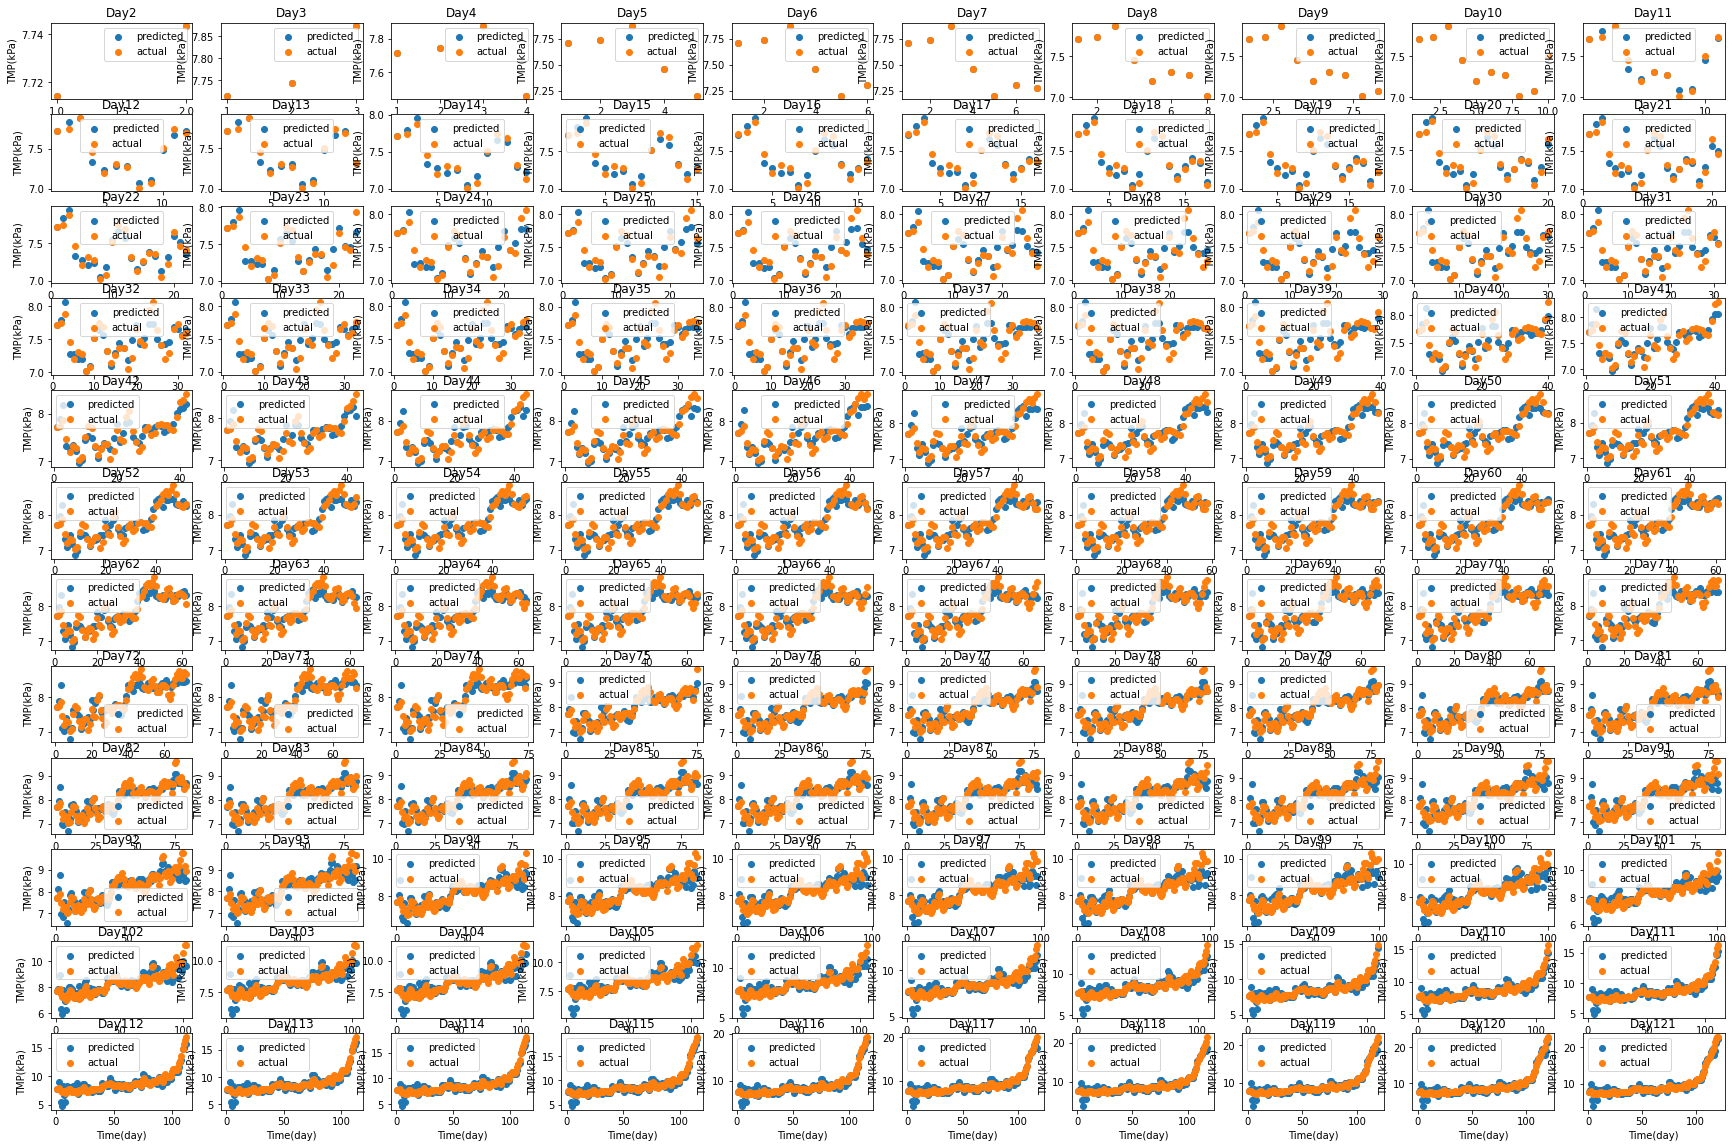

In [ ]:
X = new_df2[['Kb','Ki','Kc','Ks','COD','TN','SS','del_TMP','slope']]
y = new_df2[['TMP']]

X100 = sklearn.utils.shuffle(X)[0:100]

# a simple linear model
model = sklearn.linear_model.LinearRegression()

target_range = len(X)

plt.figure(figsize=(30,20))
for i in range(2, target_range):
  target_X = X.iloc[0:i,:]
  target_y = y.iloc[0:i]
  fitting = model.fit(target_X, target_y)
  y_pred = model.predict(target_X)
  # print(i, y_pred)
  # plt.figure()
  plt.subplot(12,10,i-1)
  plt.scatter(range(1,len(y_pred)+1), y_pred, label = 'predicted')
  plt.scatter(range(1,len(y_pred)+1), target_y, label = 'actual')
  plt.xlabel('Time(day)')
  plt.ylabel('TMP(kPa)')
  plt.title('Day'+str(i))
  plt.legend()

plt.show()



In [ ]:
X.head()

Kb           Ki            Kc            Ks         COD      TN  \
0  0.000000e+00     0.000000  0.000000e+00  2.539540e+00  111.280000  49.012   
1  2.150000e-08   529.635845  4.320790e-04  2.026410e-04  112.600000  49.296   
2  7.810000e-08  2092.434905  1.420000e-08  1.180000e-08  111.540000  49.190   
3 -1.590000e-08    -0.029619 -1.382392e-02  5.148340e-04  109.486667  48.826   
4 -1.430000e-07 -1679.369972 -2.806010e-04  8.190000e-05  107.206667  48.880   

           SS   del_TMP     slope  
0  175.560000  0.000000  0.000000  
1  177.560000  0.028759  0.014380  
2  174.006667  0.130550  0.053103  
3  169.786667 -0.412794 -0.063371  
4  169.560000 -0.260158 -0.102729

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Kb       122 non-null    float64
 1   Ki       122 non-null    float64
 2   Kc       122 non-null    float64
 3   Ks       122 non-null    float64
 4   COD      122 non-null    float64
 5   TN       122 non-null    float64
 6   SS       122 non-null    float64
 7   del_TMP  122 non-null    float64
 8   slope    122 non-null    float64
dtypes: float64(9)
memory usage: 8.7 KB


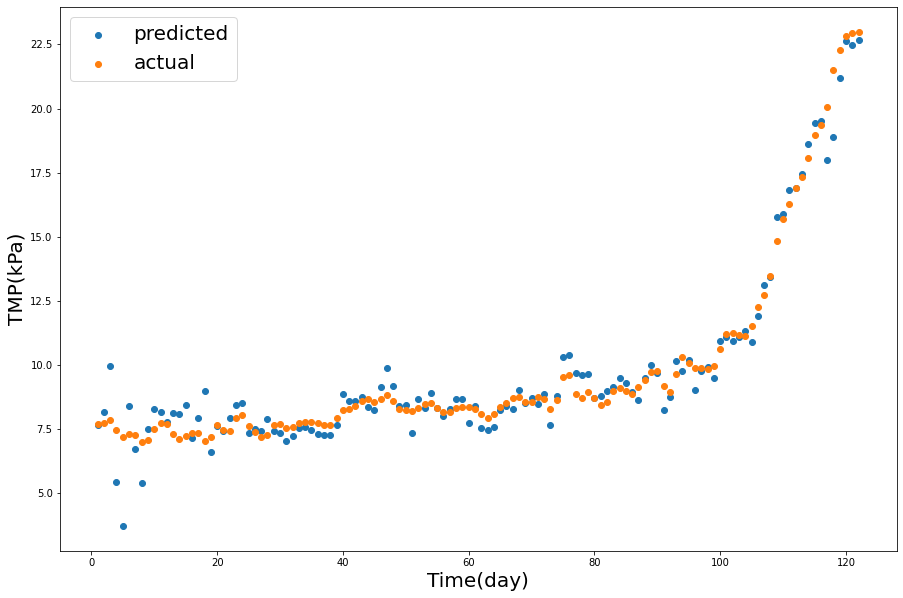

In [ ]:
X = new_df2[['Kb','Ki','Kc','Ks','COD','TN','SS','del_TMP','slope']]
y = new_df2[['TMP']]

X100 = sklearn.utils.shuffle(X)[0:100]

# a simple linear model
model = sklearn.linear_model.LinearRegression()

target_range = len(X)

plt.figure(figsize=(15,10))

target_X = X.iloc[0:target_range,:]
target_y = y.iloc[0:target_range]
fitting = model.fit(target_X, target_y)
y_pred = model.predict(target_X)

plt.scatter(range(1,len(y_pred)+1), y_pred, label = 'predicted')
plt.scatter(range(1,len(y_pred)+1), target_y, label = 'actual')
plt.xlabel('Time(day)', fontsize=20)
plt.ylabel('TMP(kPa)', fontsize=20)
plt.legend(fontsize=20)

plt.show()



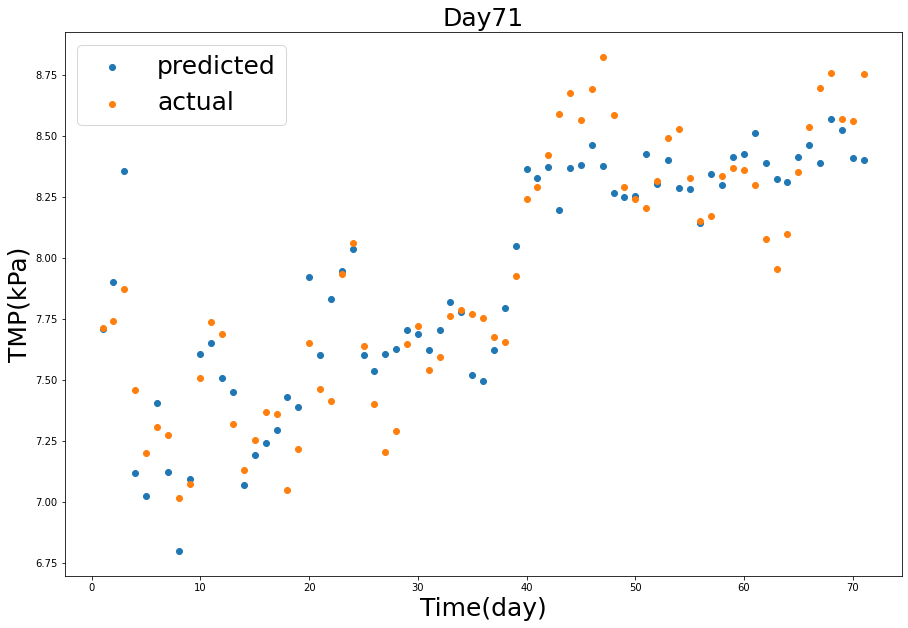

In [ ]:
X = new_df2[['Kb','Ki','Kc','Ks','COD','TN','SS','del_TMP','slope']]
y = new_df2[['TMP']]

X100 = sklearn.utils.shuffle(X)[0:100]

# a simple linear model
model = sklearn.linear_model.LinearRegression()

target_range = 71

plt.figure(figsize=(15,10))
plt.title('Day'+str(target_range), fontsize=25)

target_X = X.iloc[0:target_range,:]
target_y = y.iloc[0:target_range]
fitting = model.fit(target_X, target_y)
y_pred = model.predict(target_X)

plt.scatter(range(1,len(y_pred)+1), y_pred, label = 'predicted')
plt.scatter(range(1,len(y_pred)+1), target_y, label = 'actual')
plt.xlabel('Time(day)', fontsize=25)
plt.ylabel('TMP(kPa)', fontsize=25)
plt.legend(fontsize=25)

plt.show()



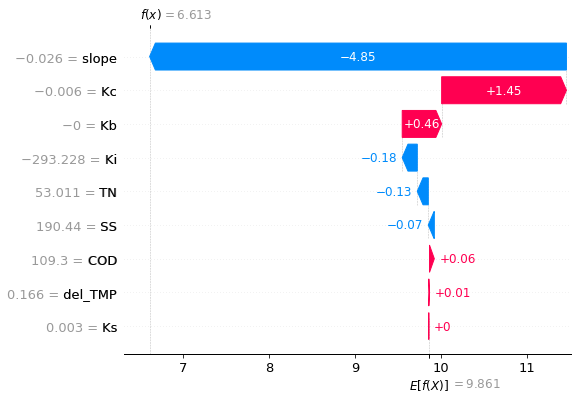

In [ ]:
import shap

# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)

target_range = len(X)

sample_ind = 18

target_X = X.iloc[0:len(X),:]
target_y = y.iloc[0:len(X)]
shap_values = explainer(target_X)
shap_val_waterfall = shap_values[sample_ind]
shap_val_waterfall.base_values =shap_val_waterfall.base_values[0]
  
shap.plots.waterfall(shap_val_waterfall, max_display=9, show=False)

plt.show()

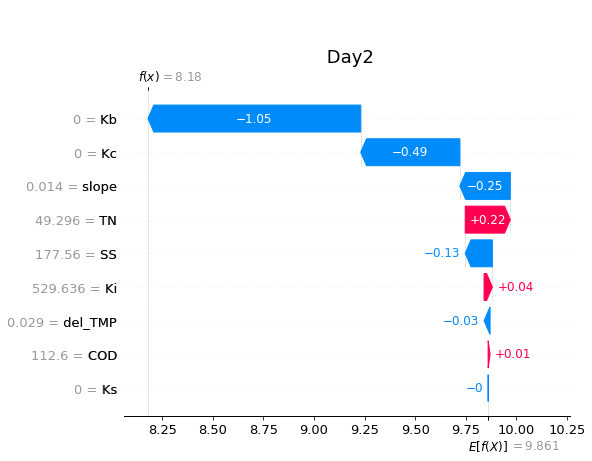

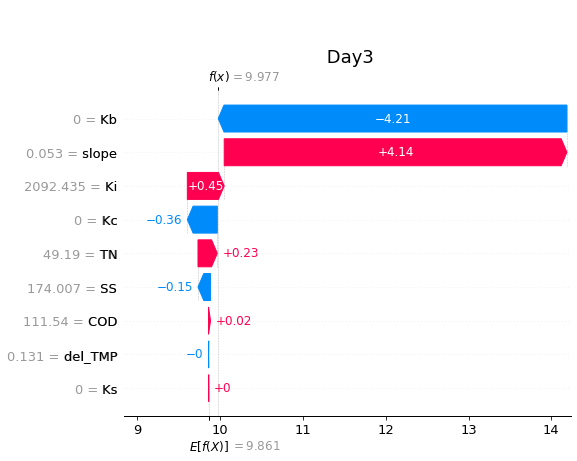

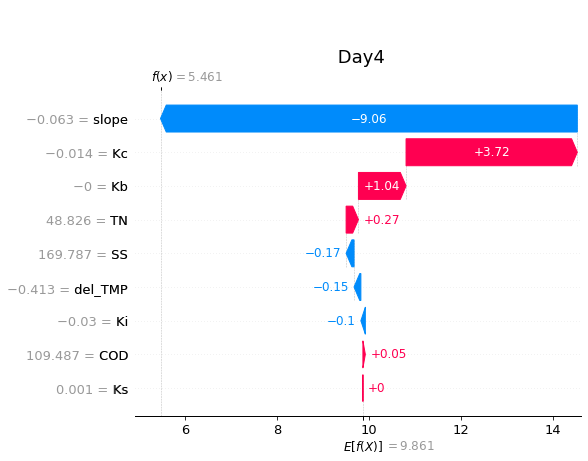

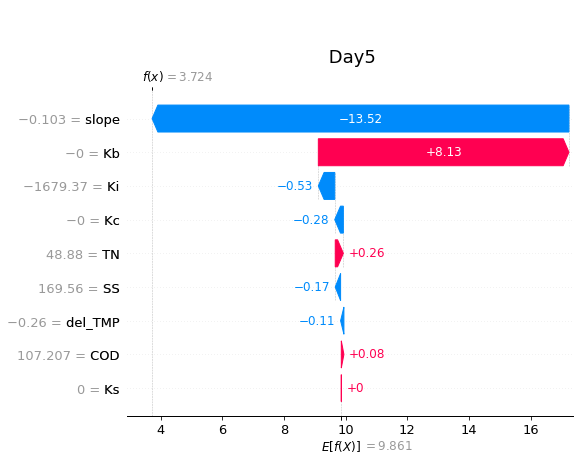

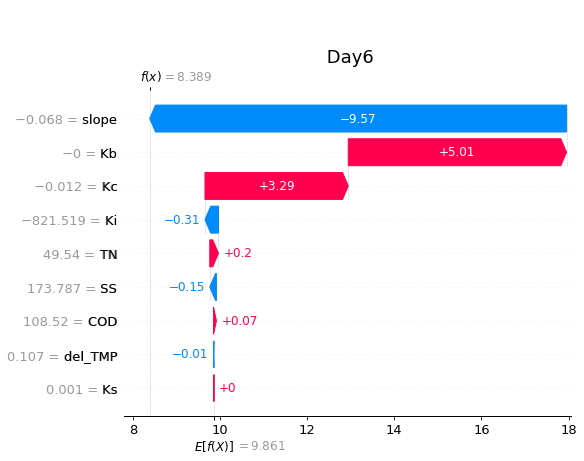

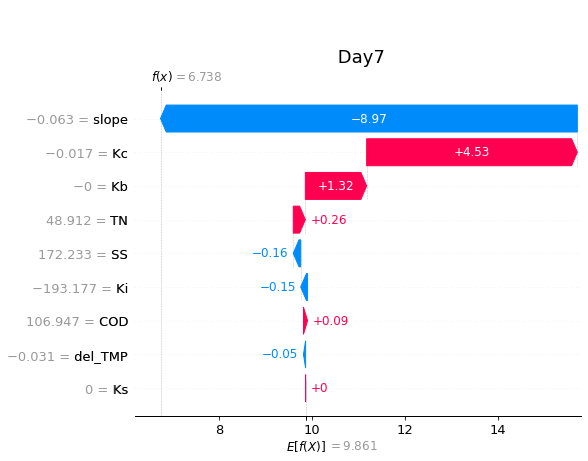

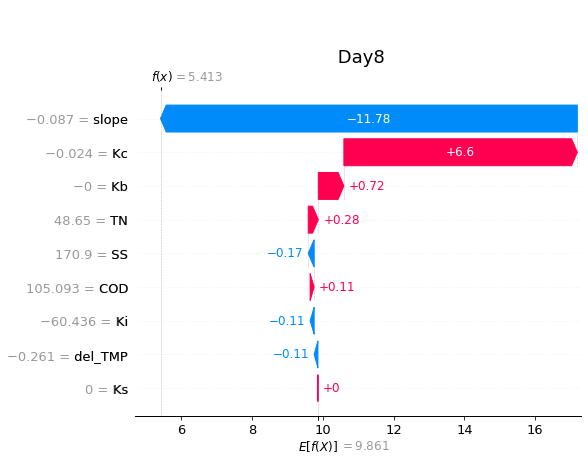

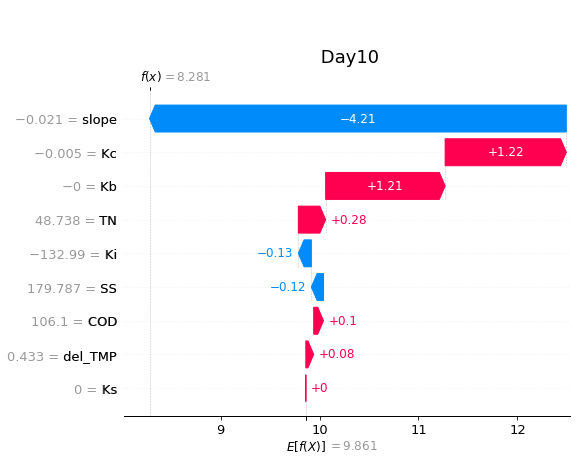

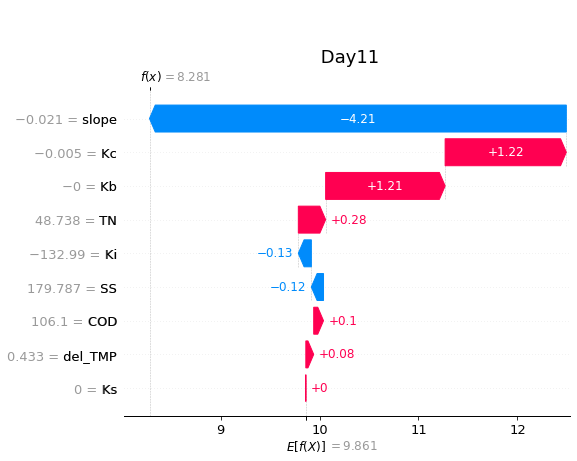

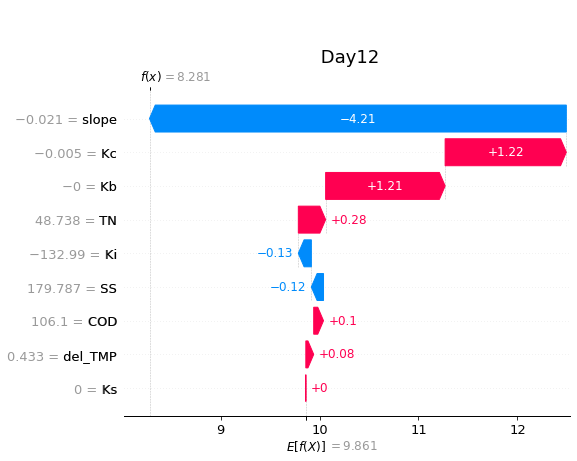

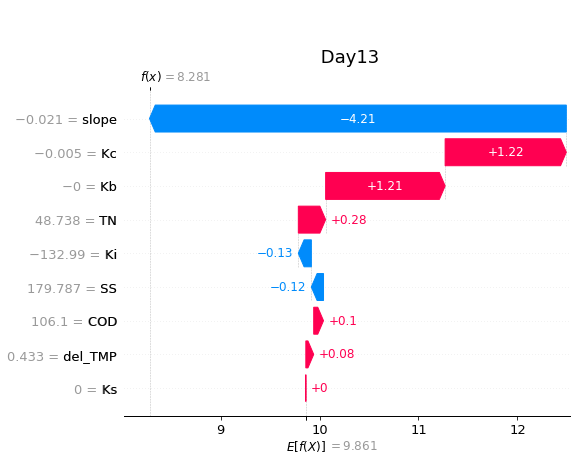

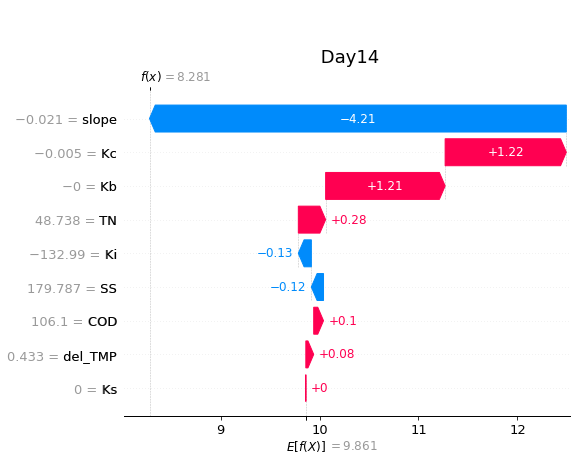

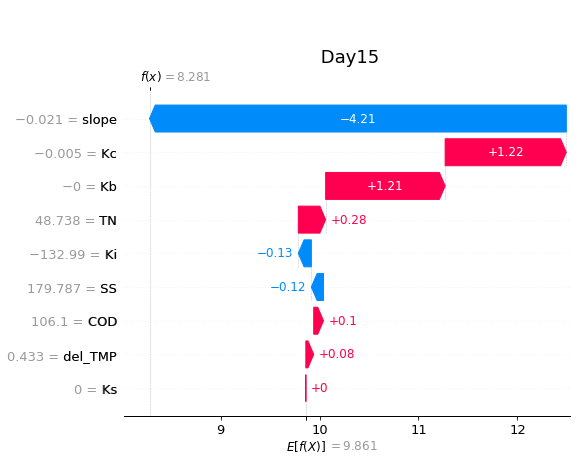

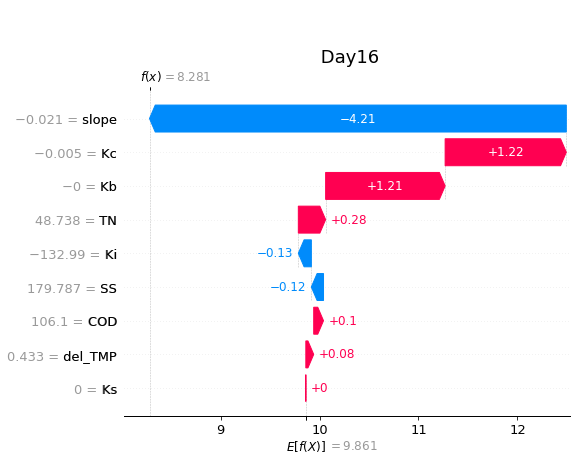

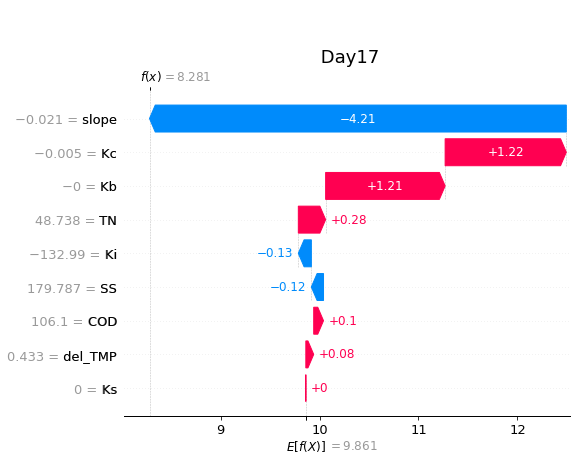

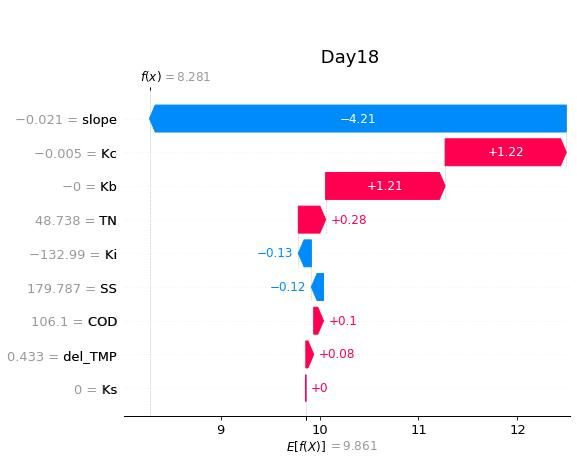

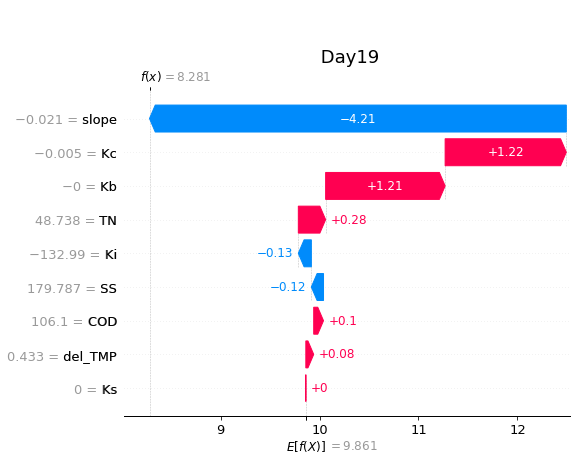

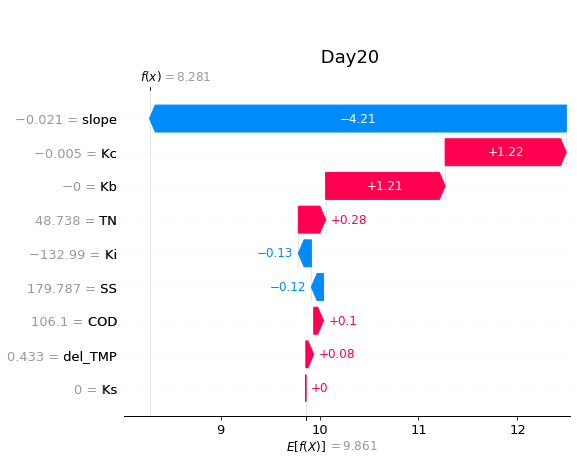

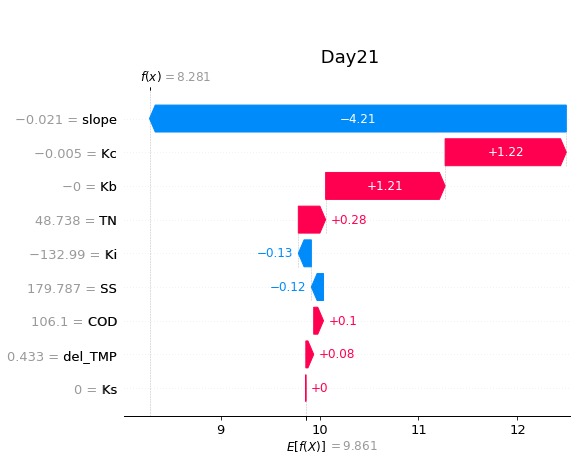

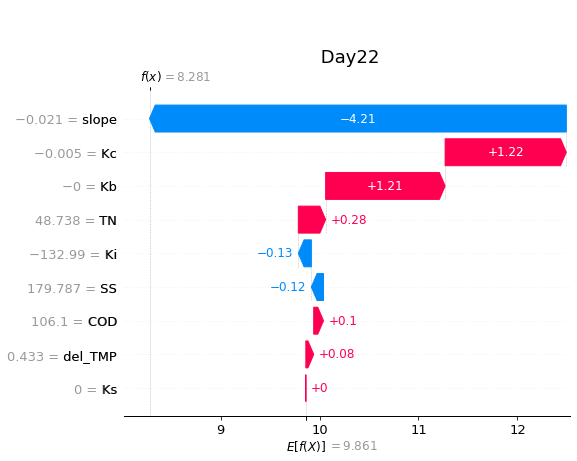

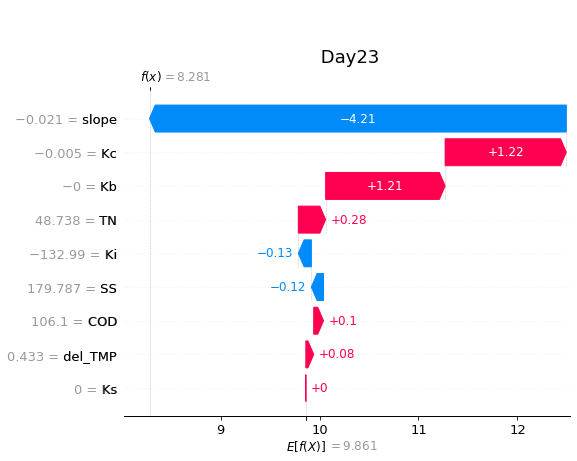

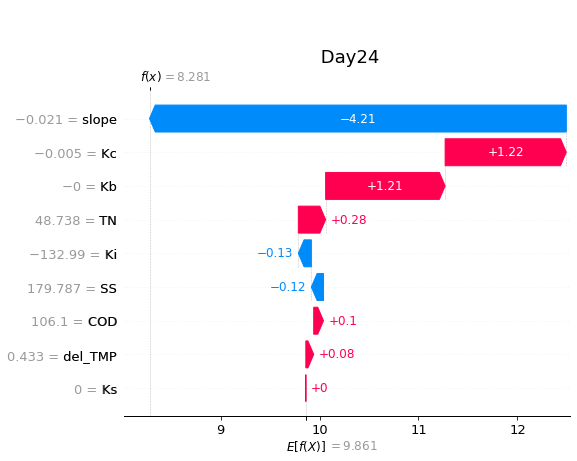

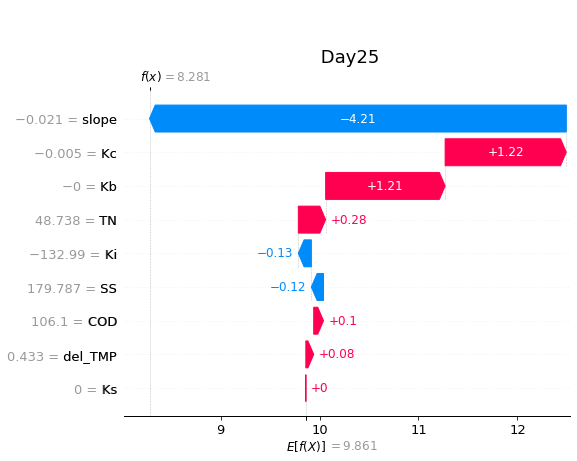

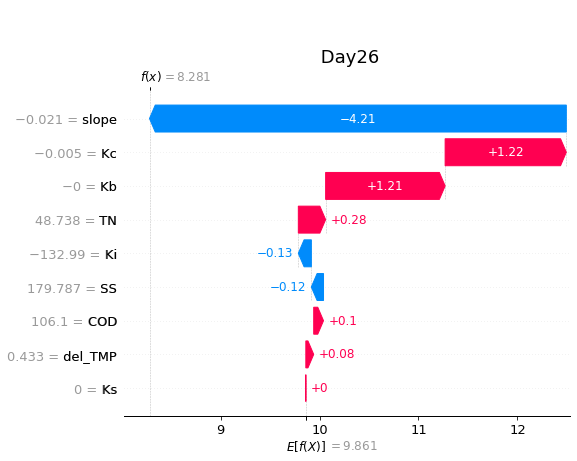

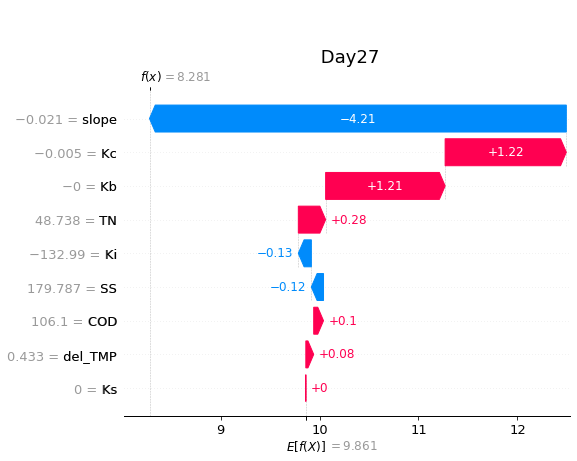

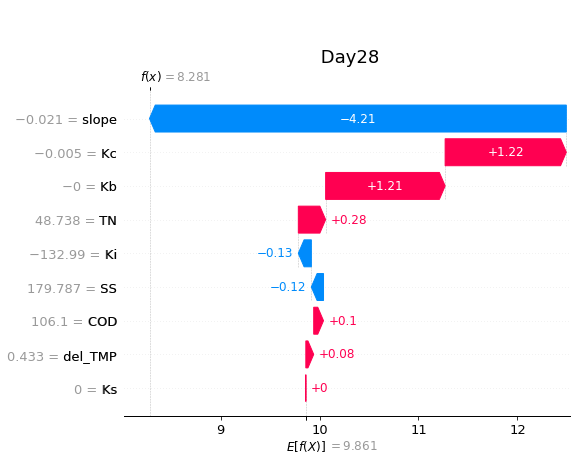

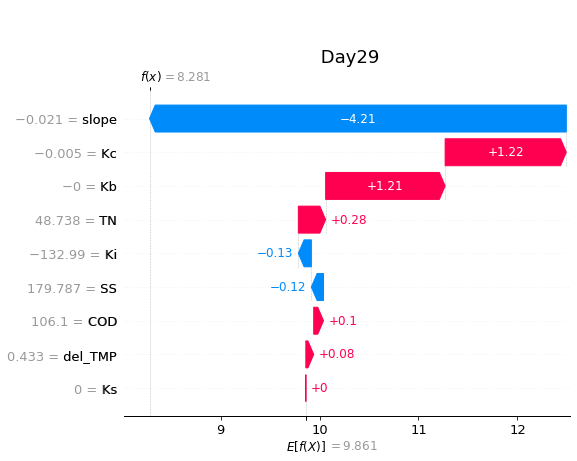

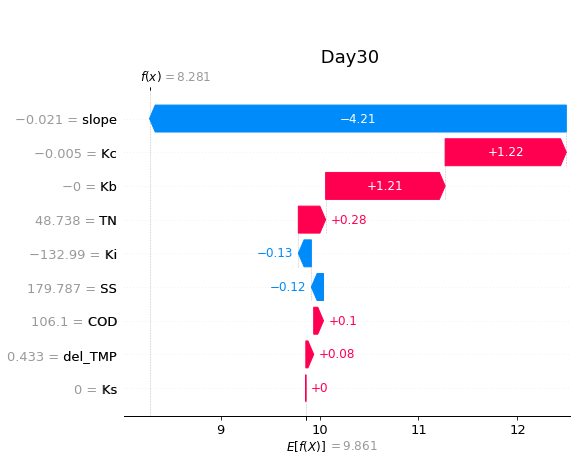

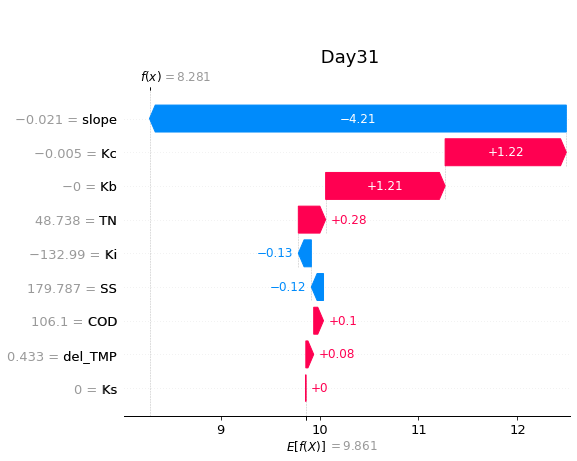

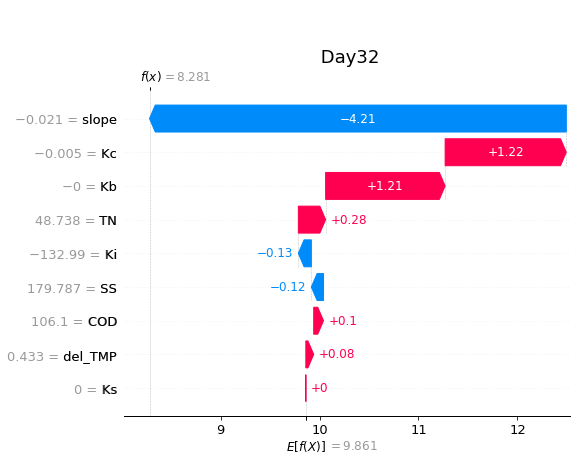

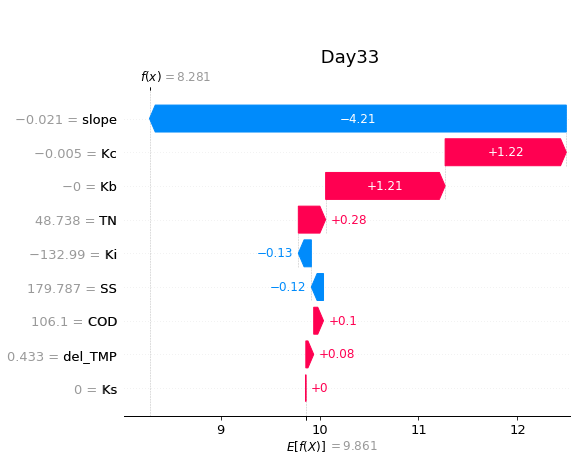

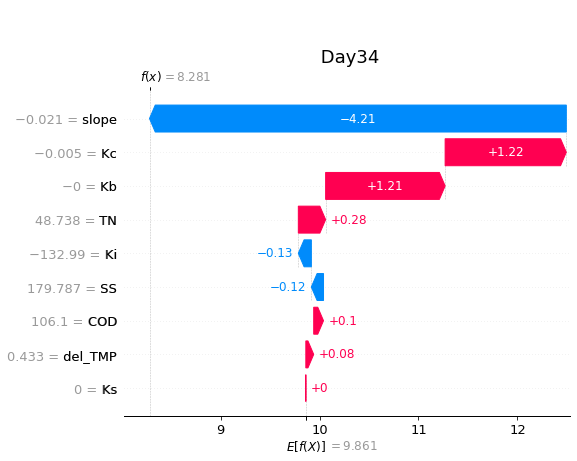

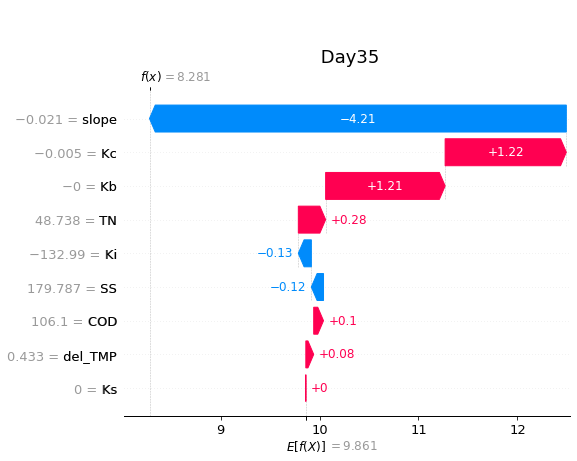

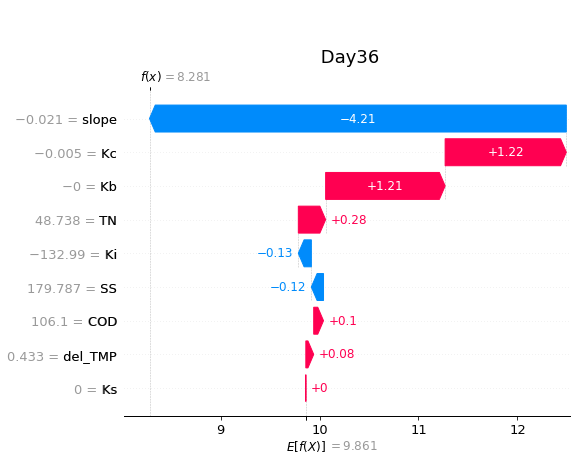

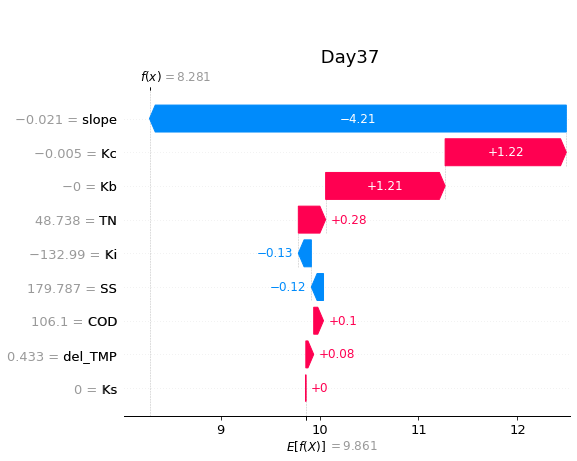

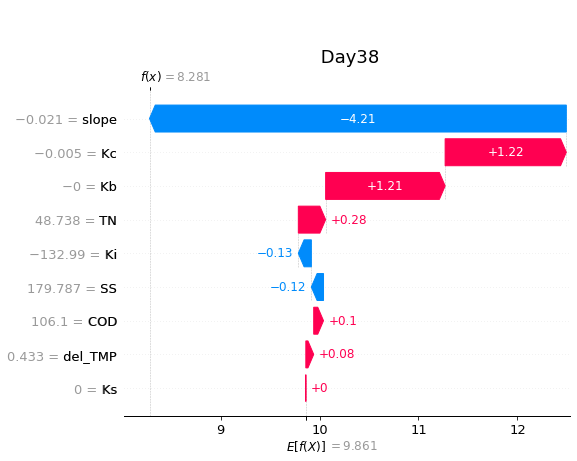

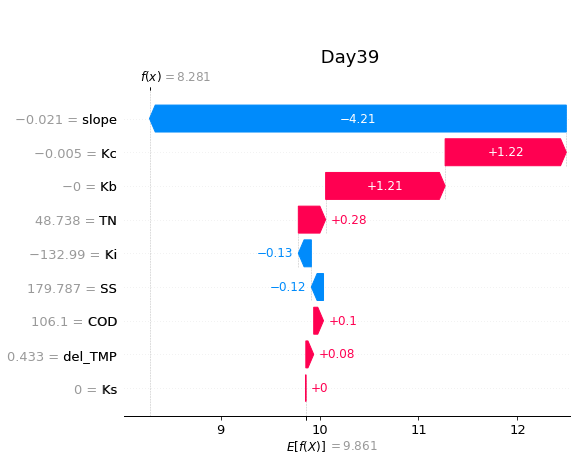

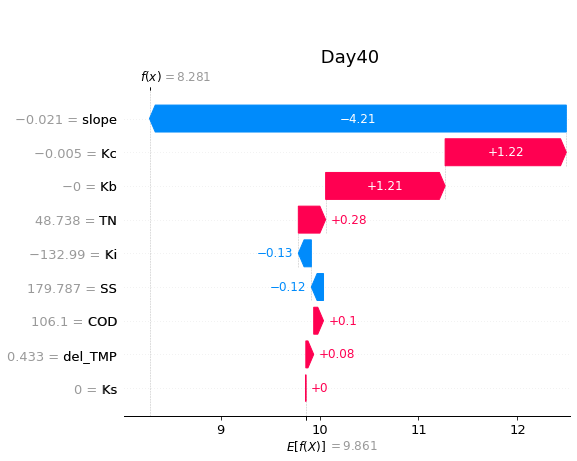

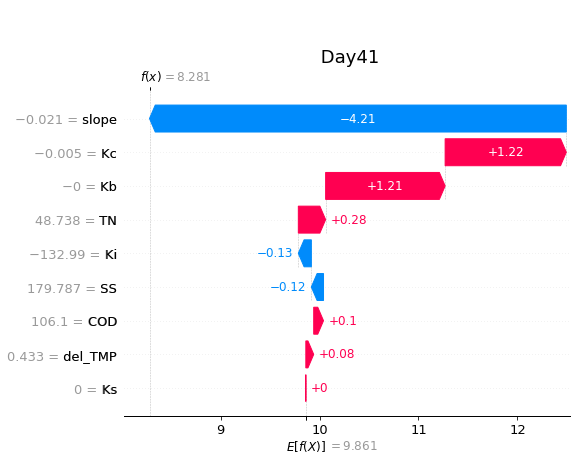

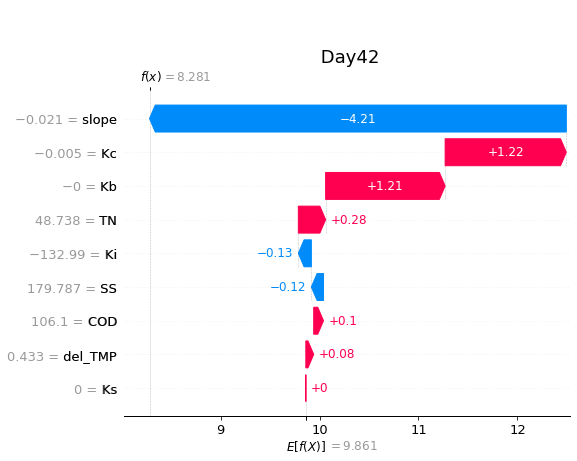

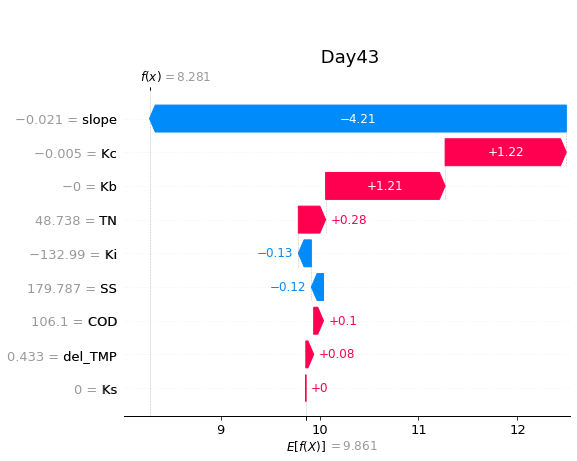

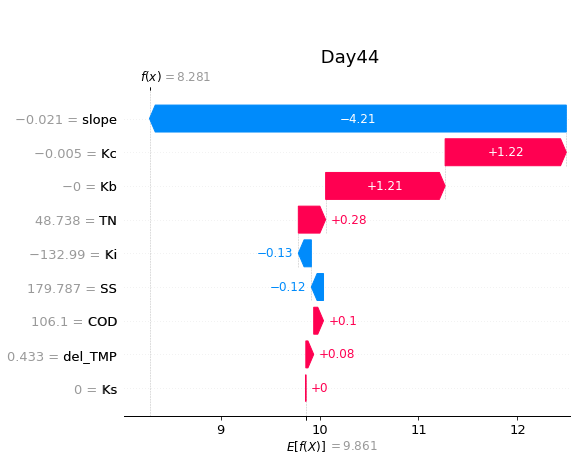

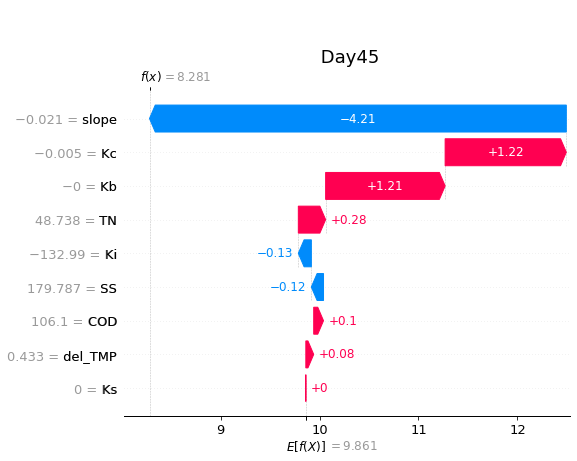

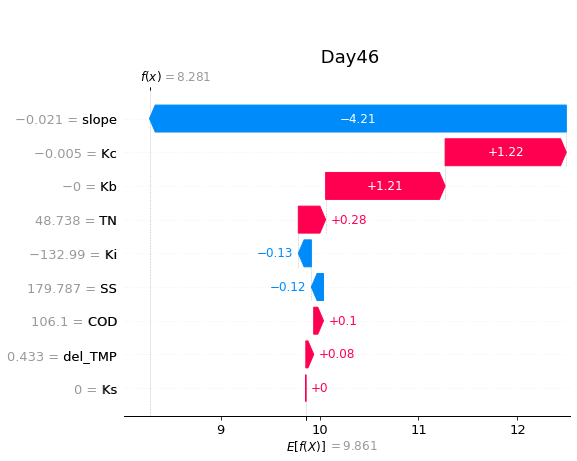

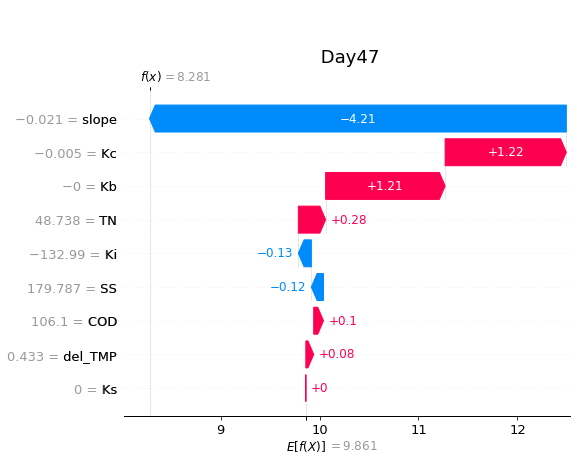

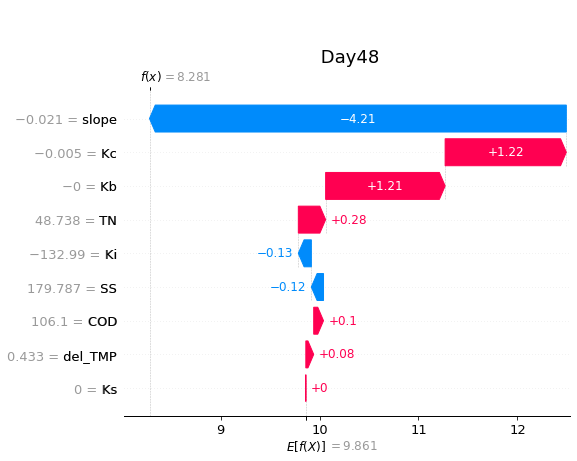

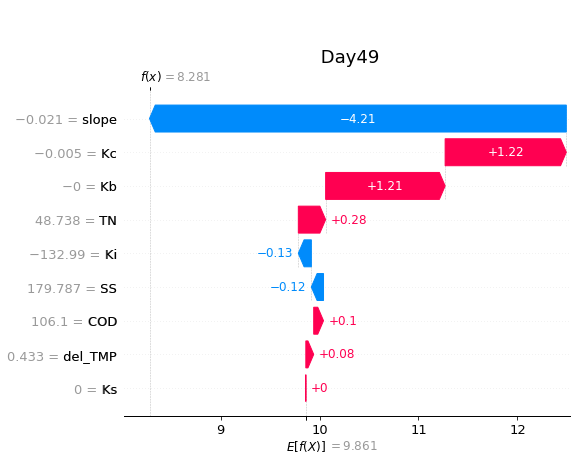

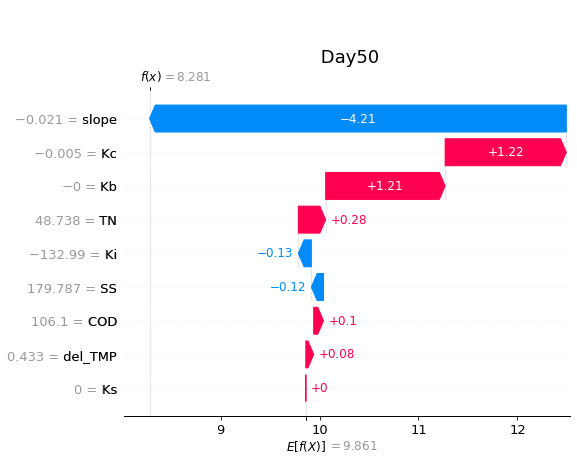

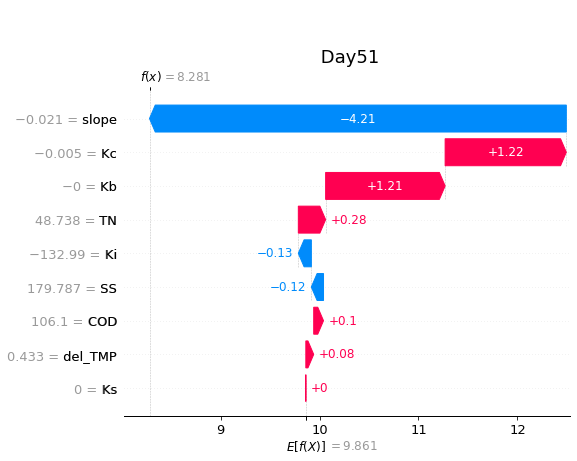

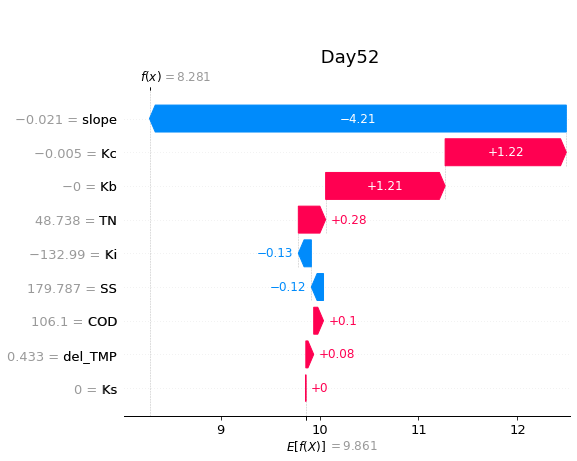

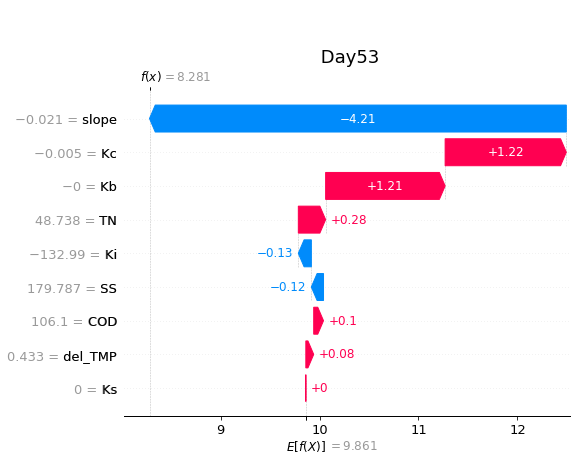

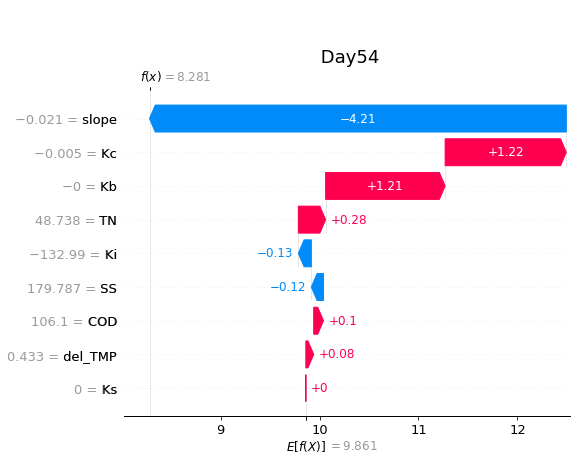

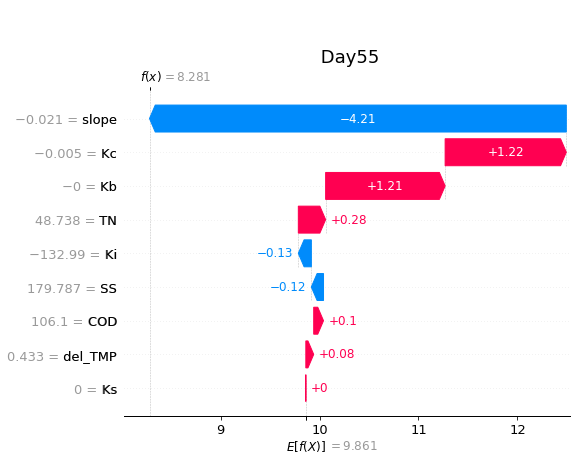

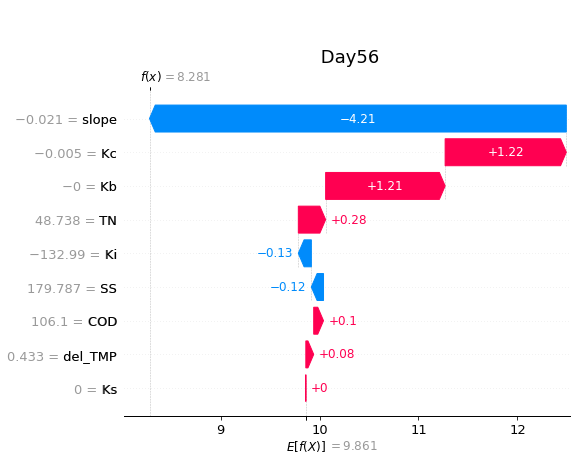

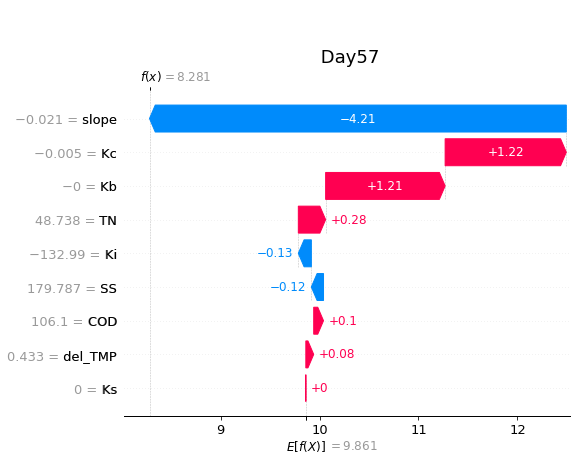

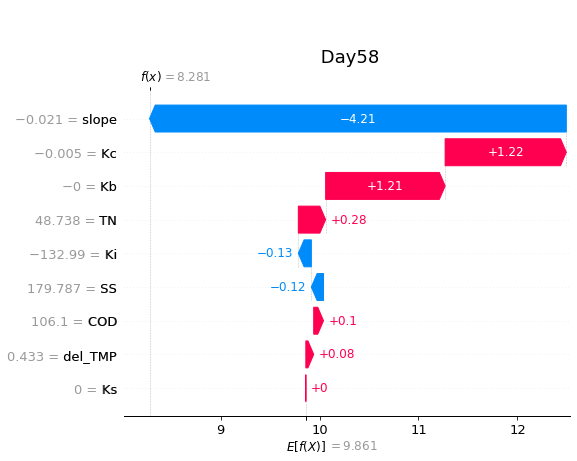

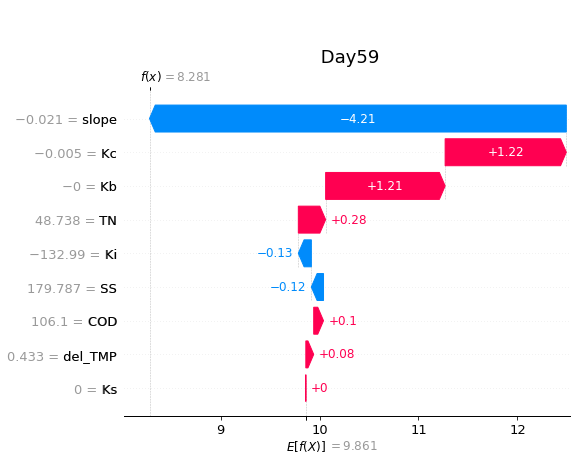

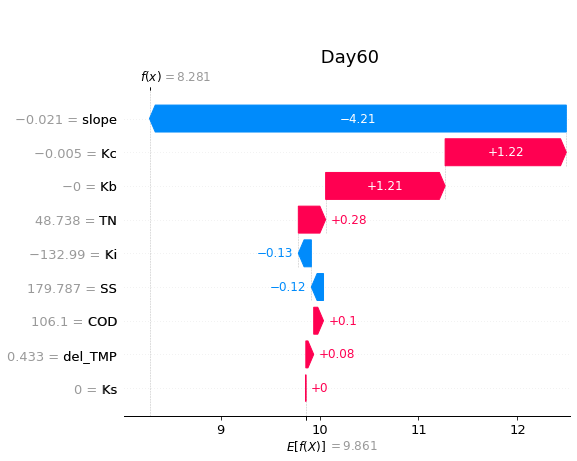

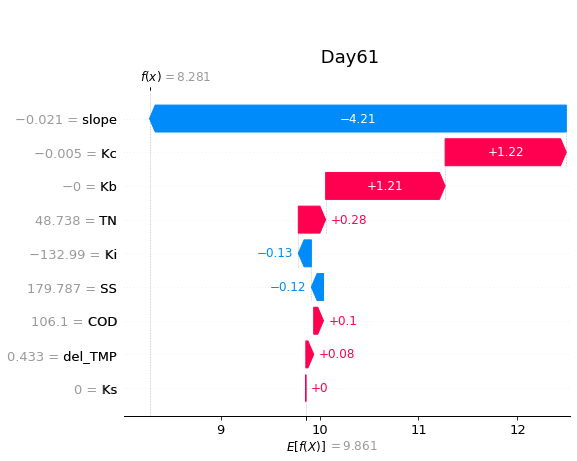

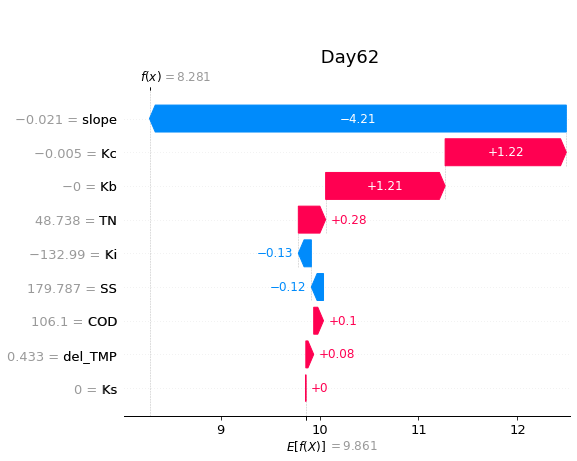

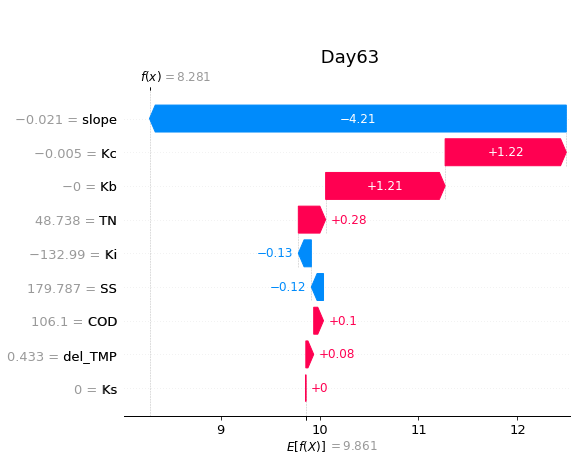

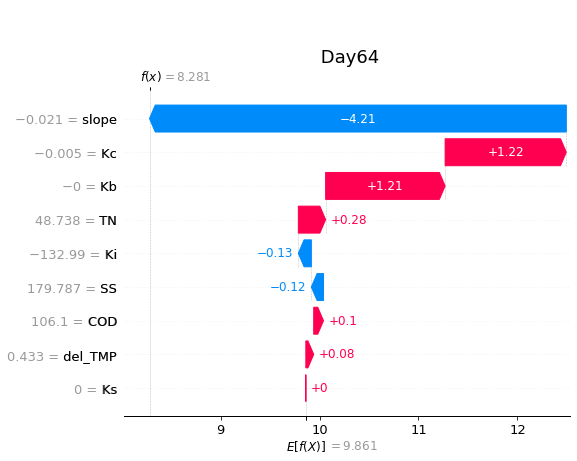

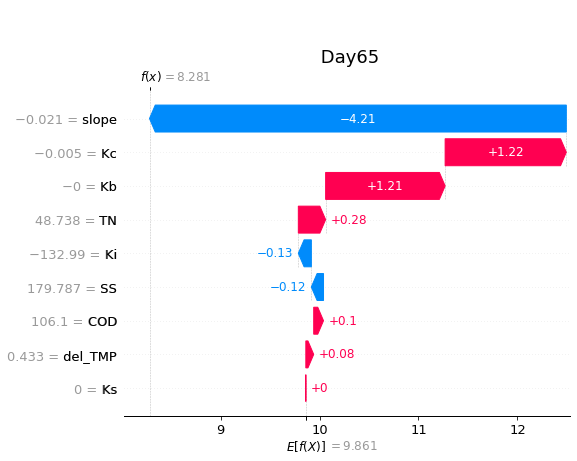

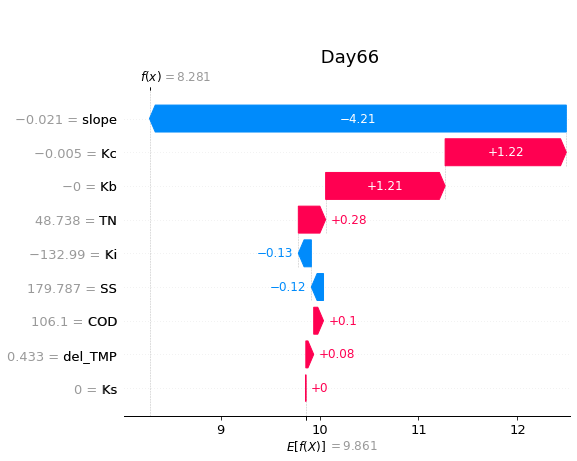

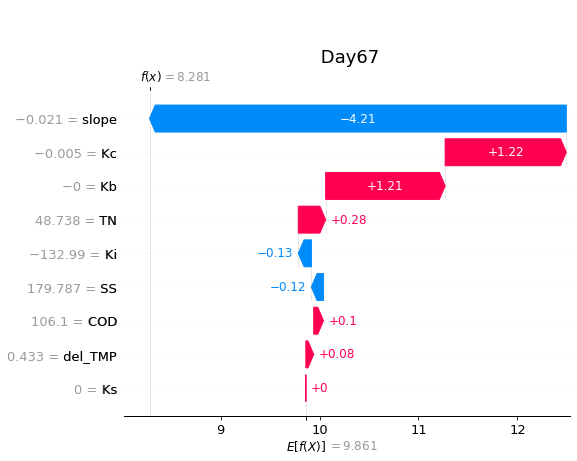

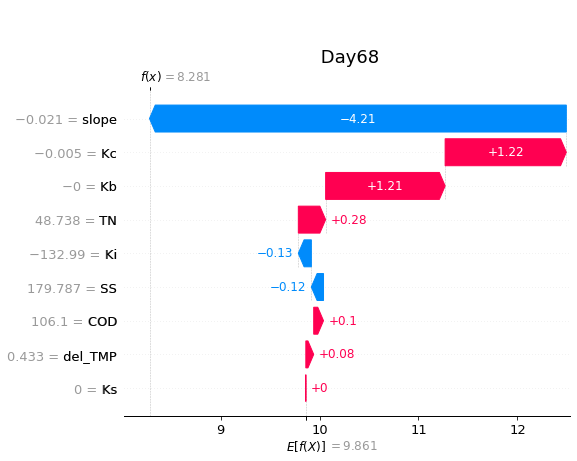

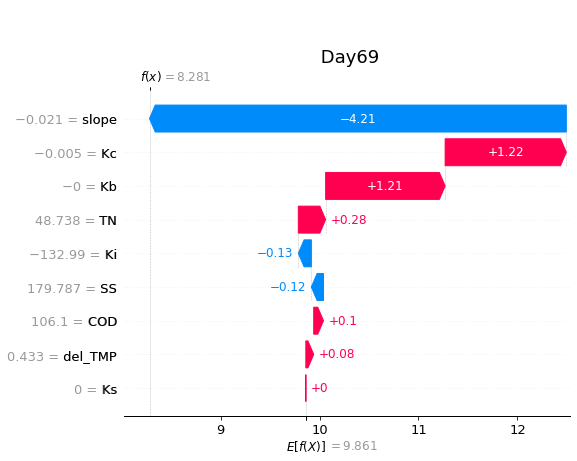

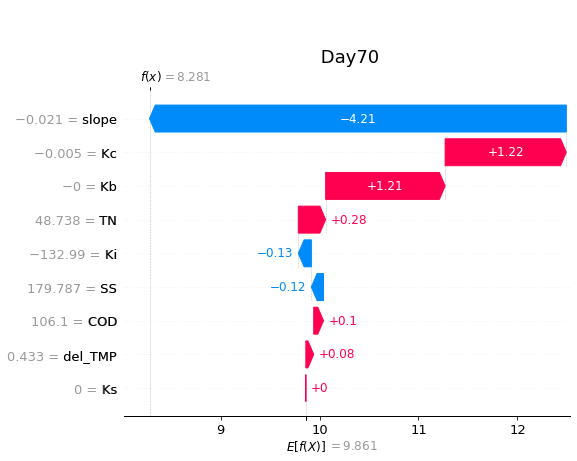

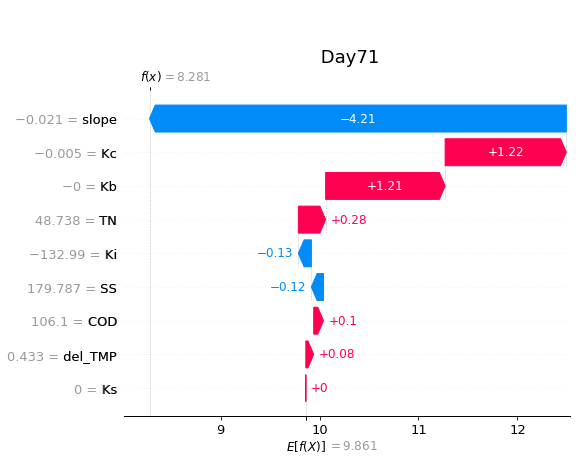

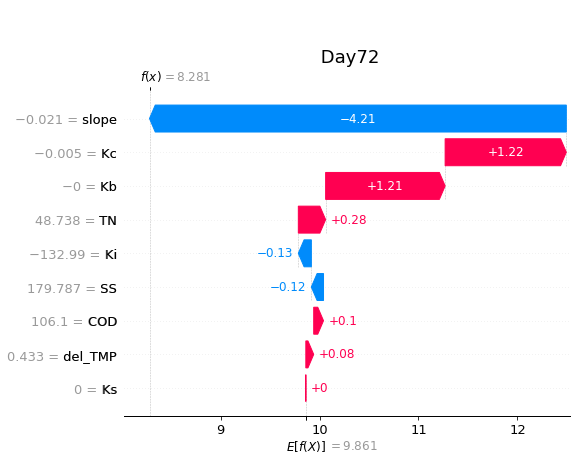

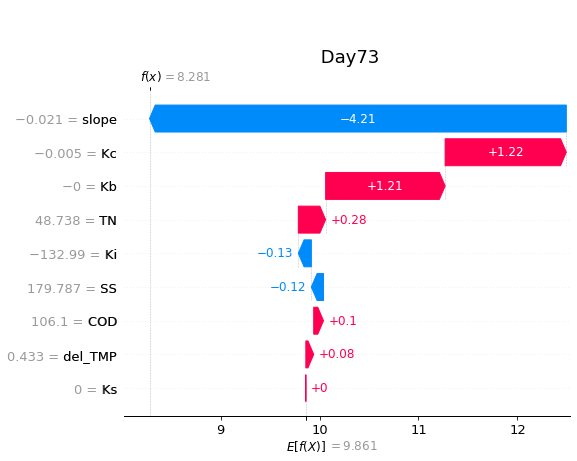

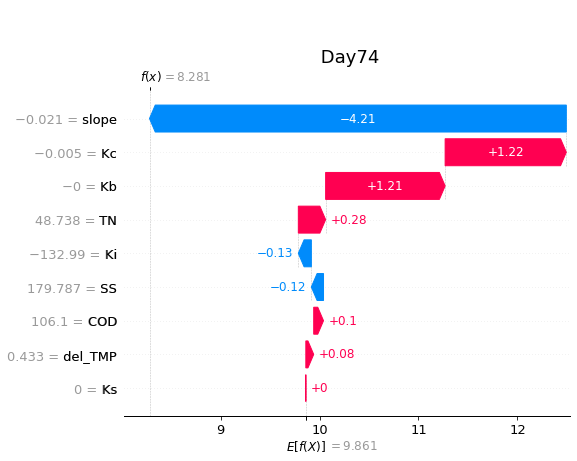

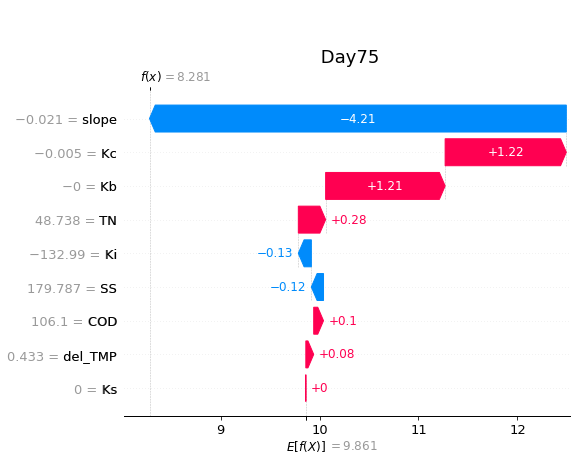

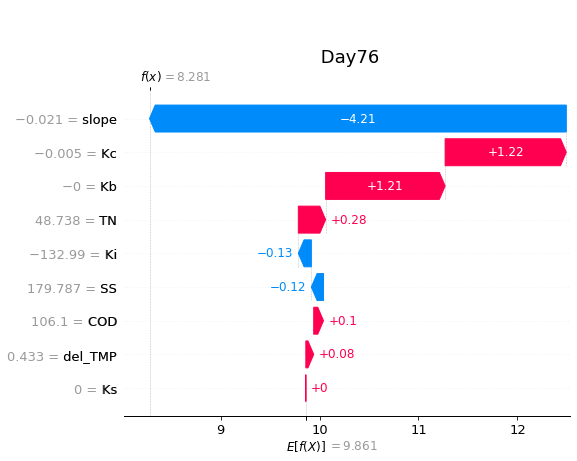

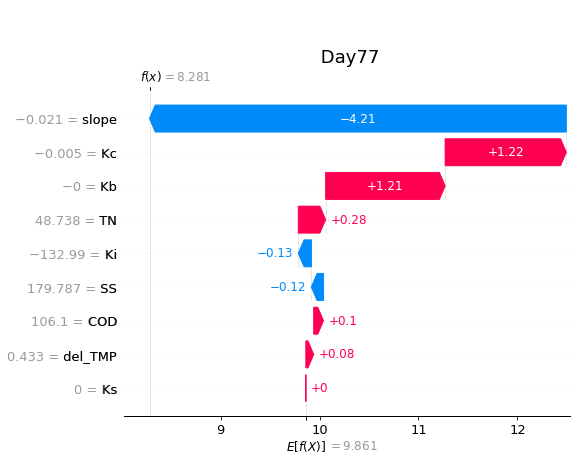

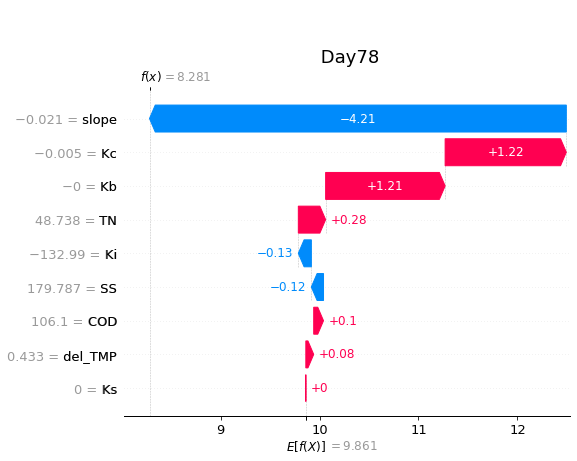

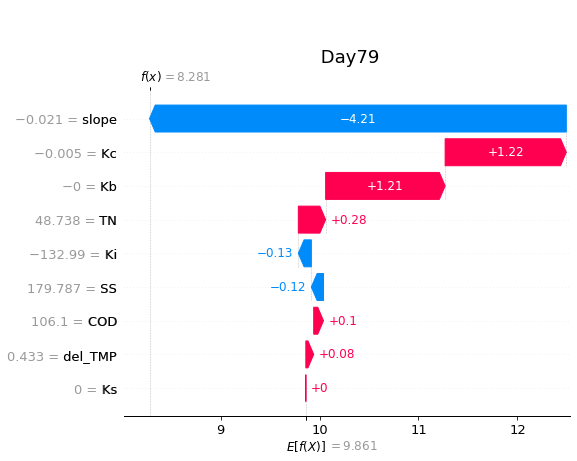

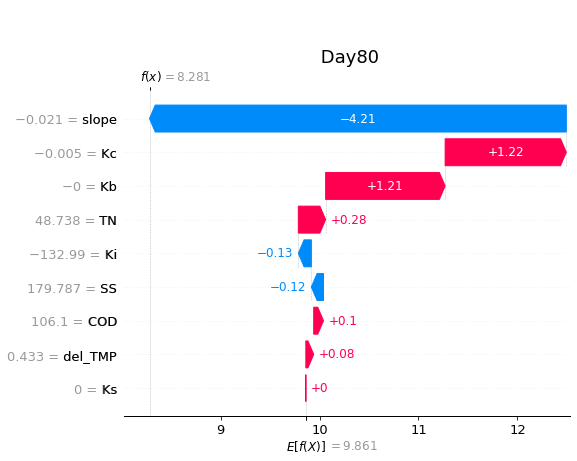

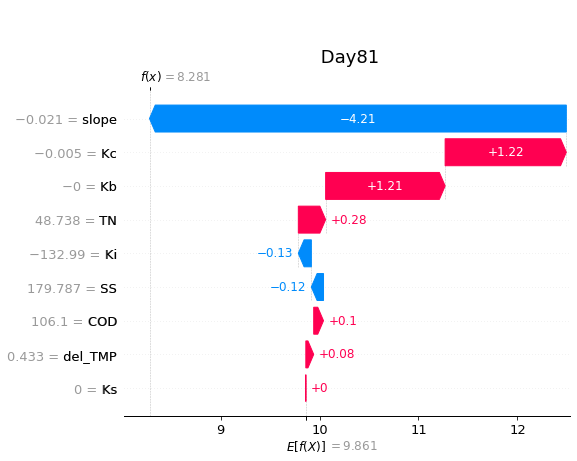

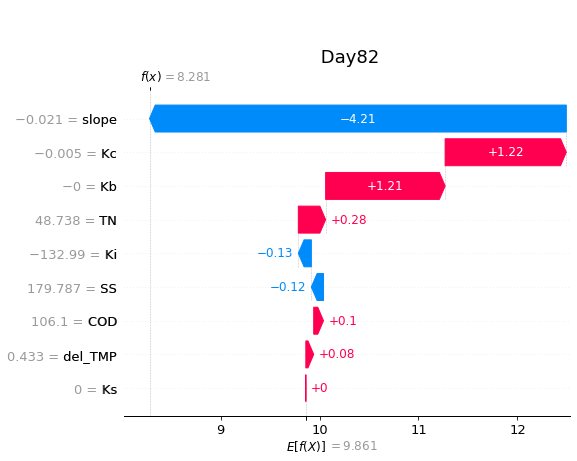

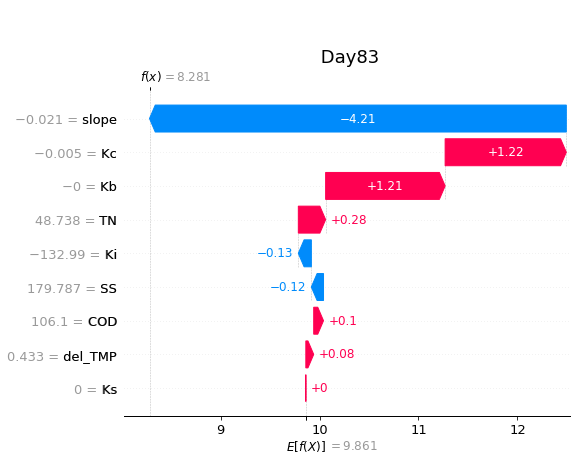

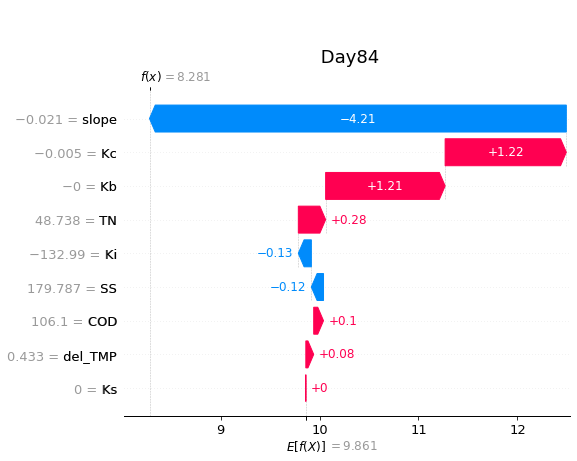

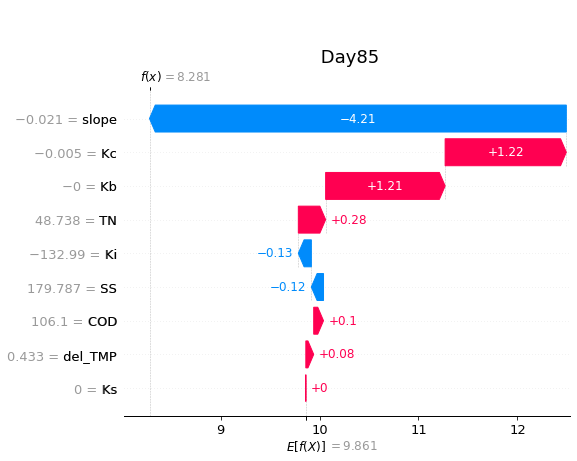

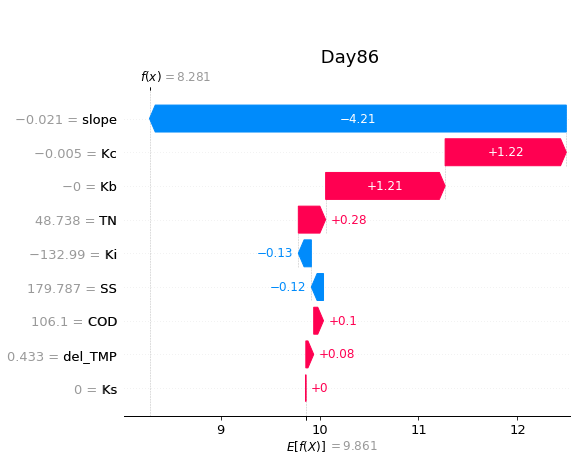

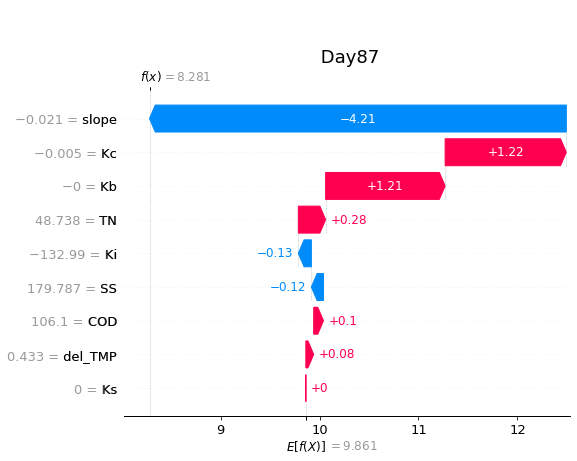

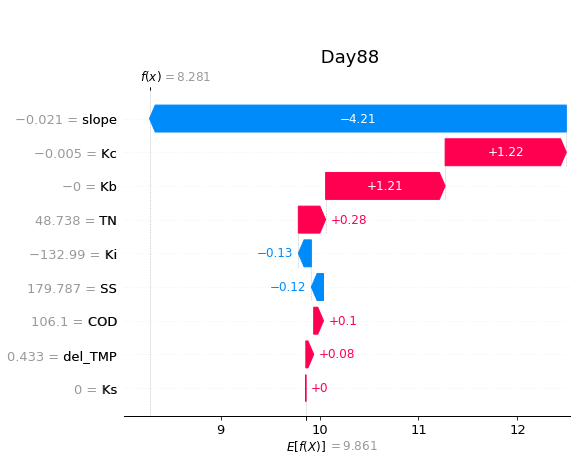

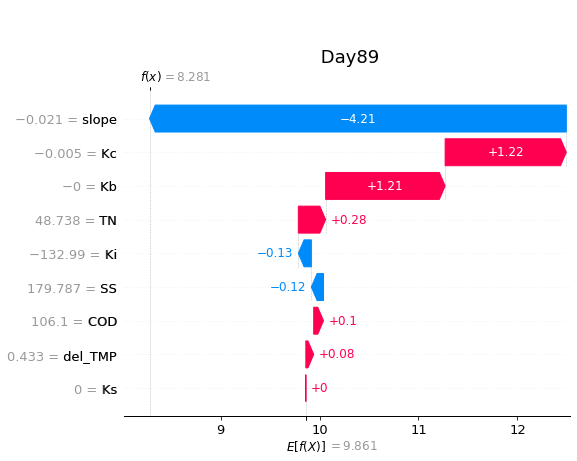

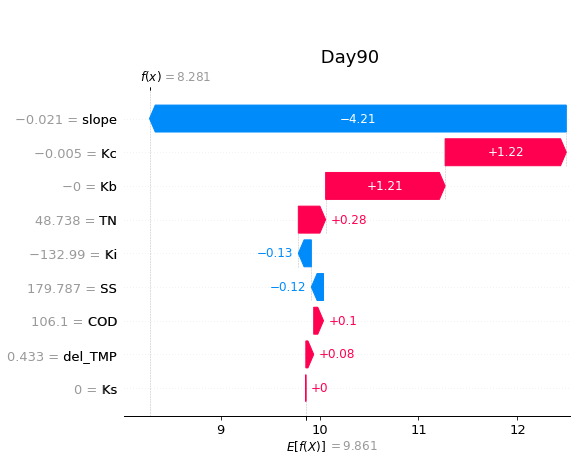

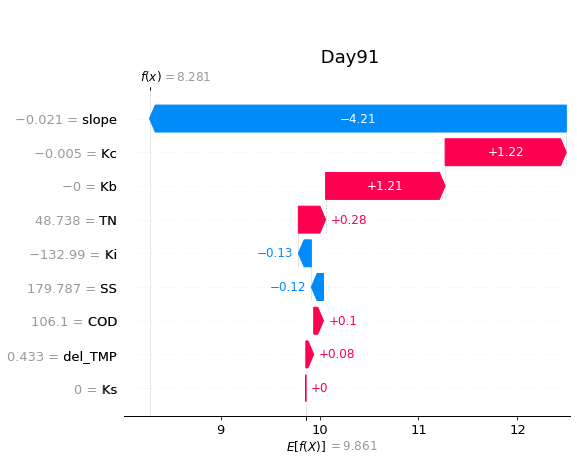

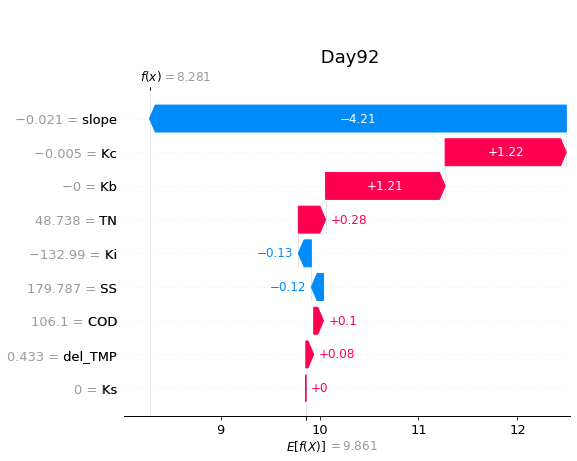

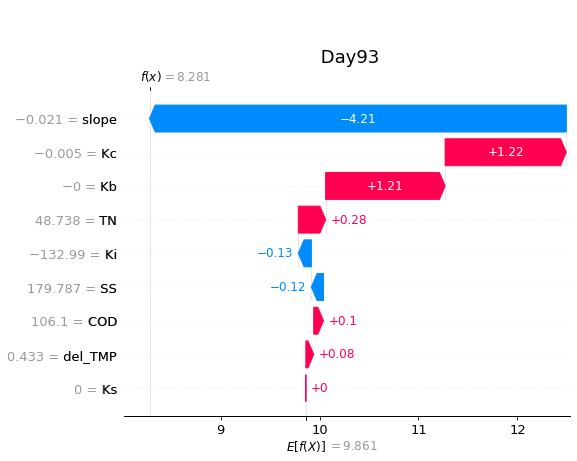

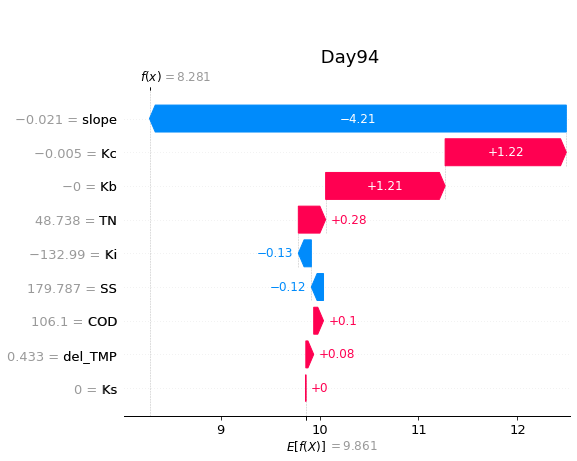

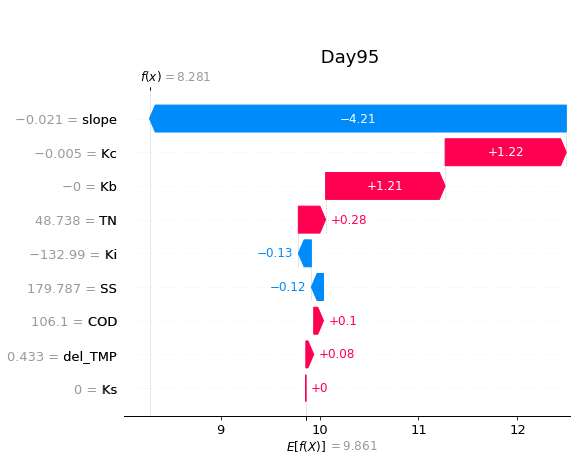

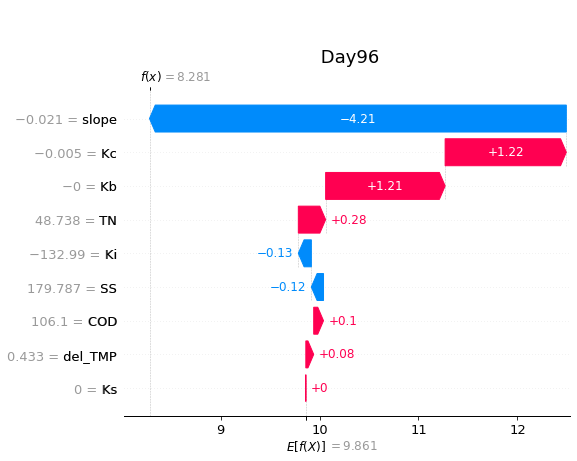

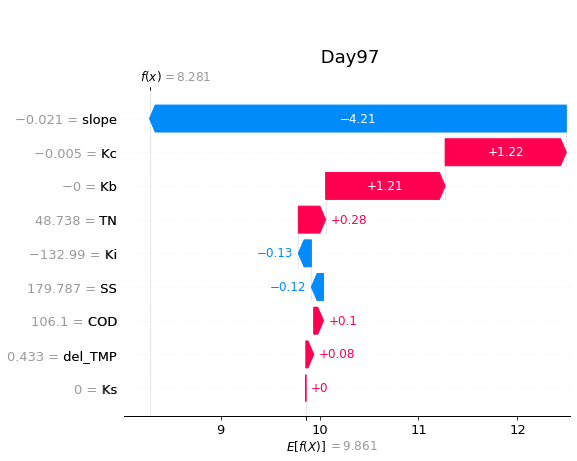

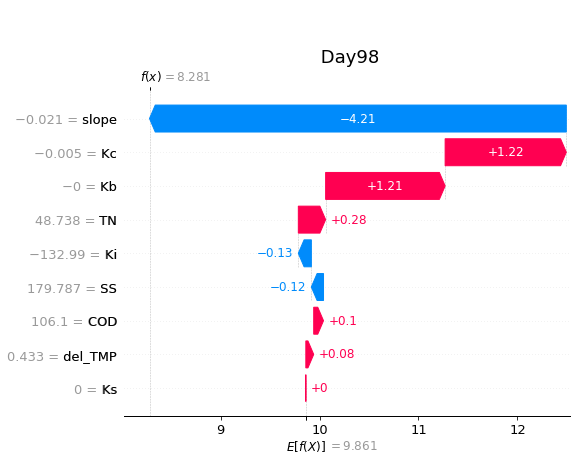

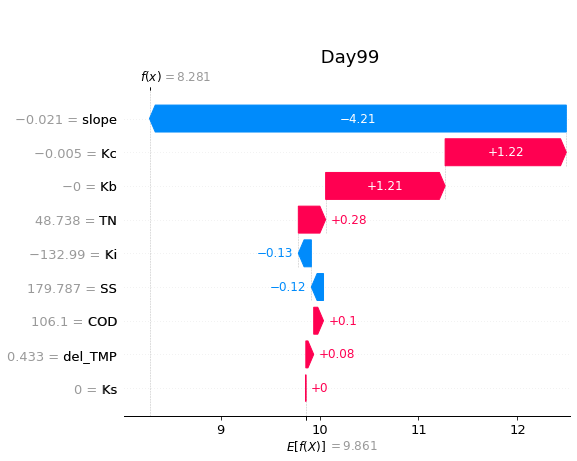

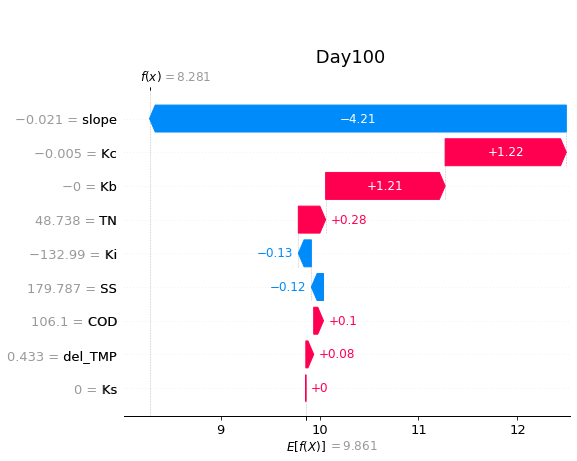

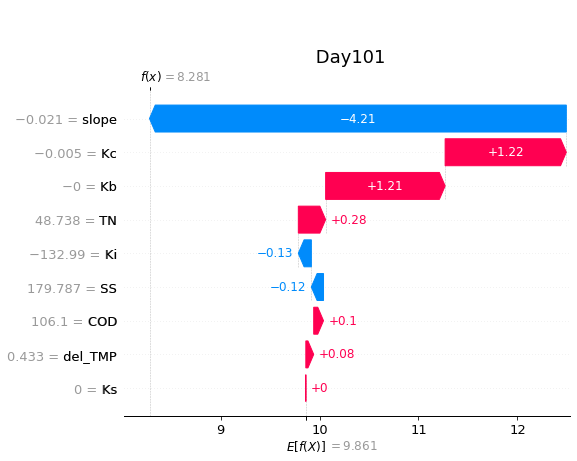

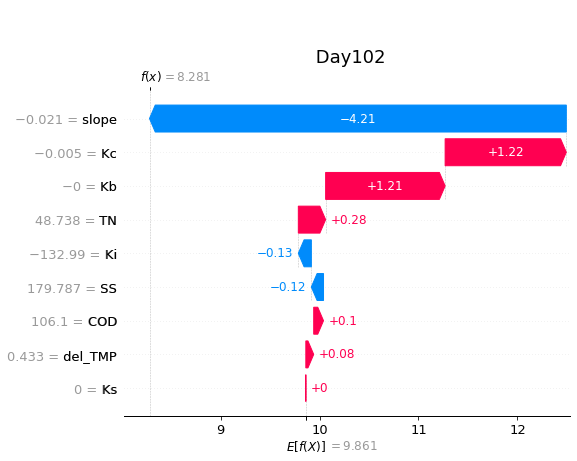

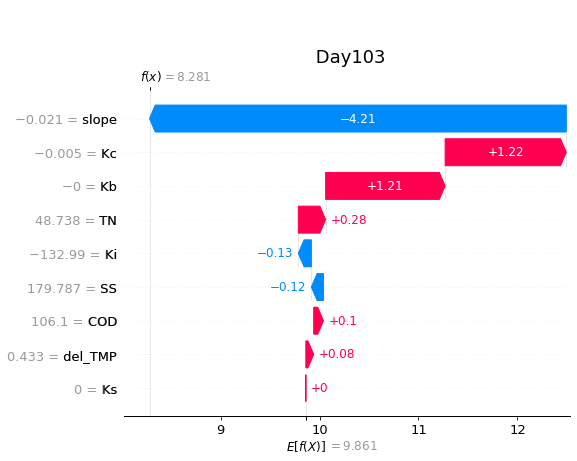

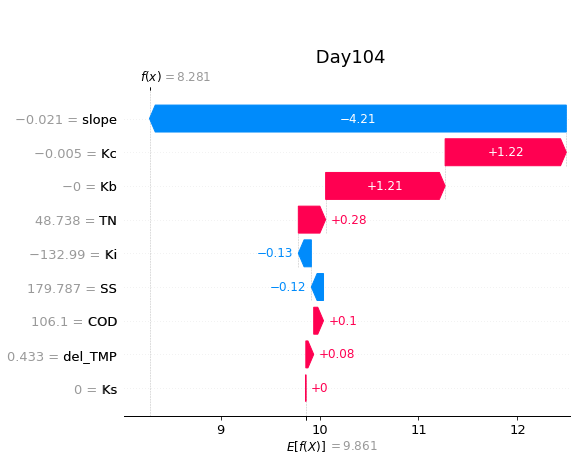

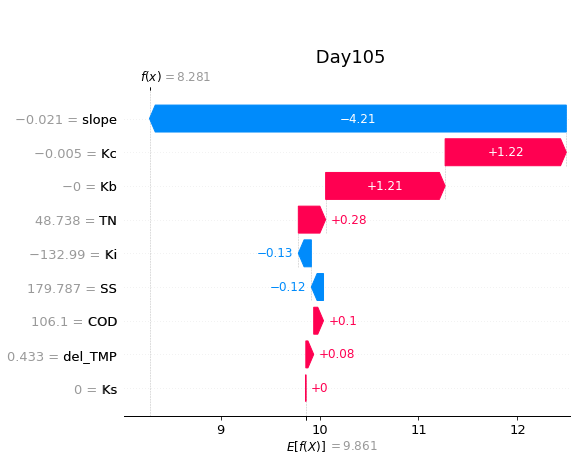

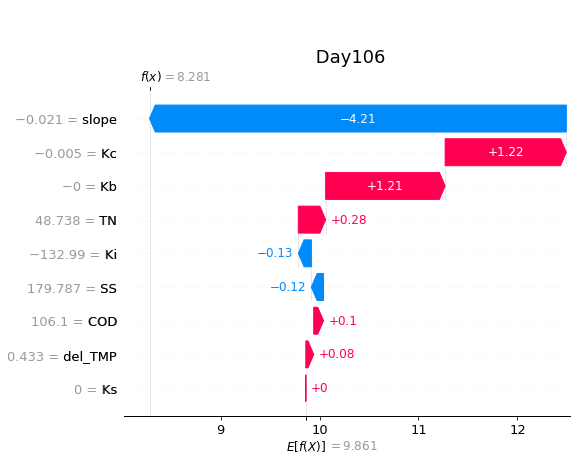

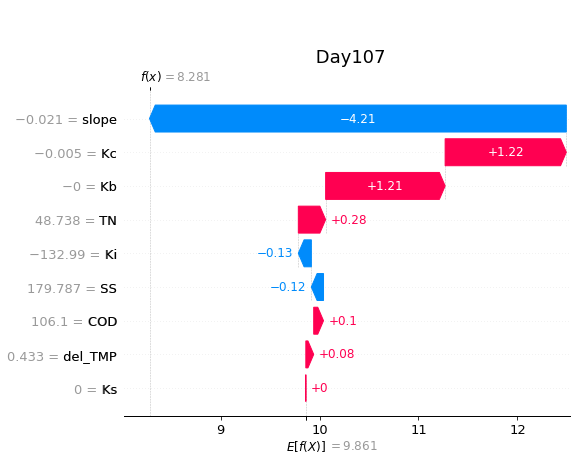

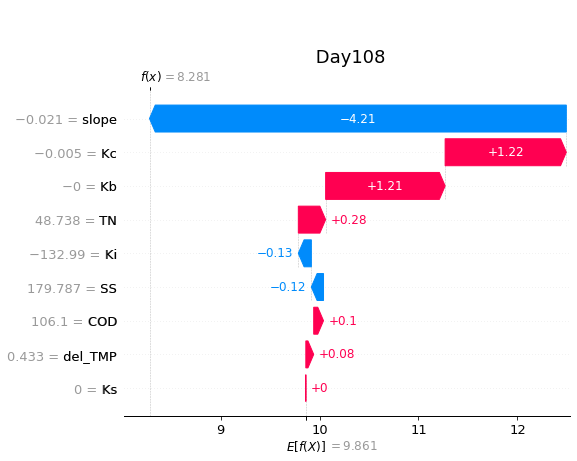

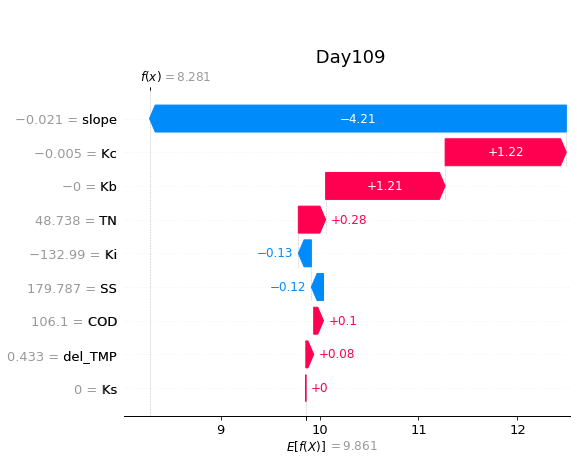

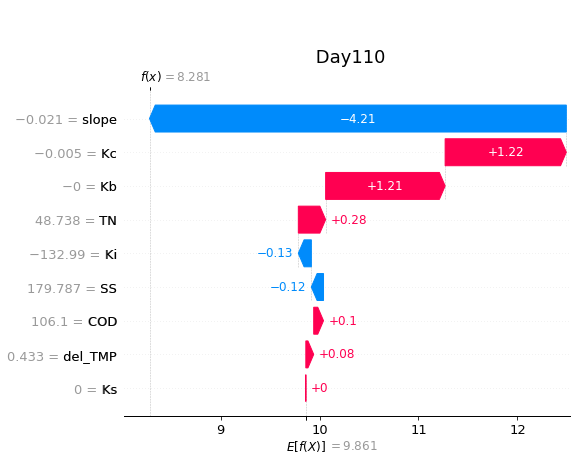

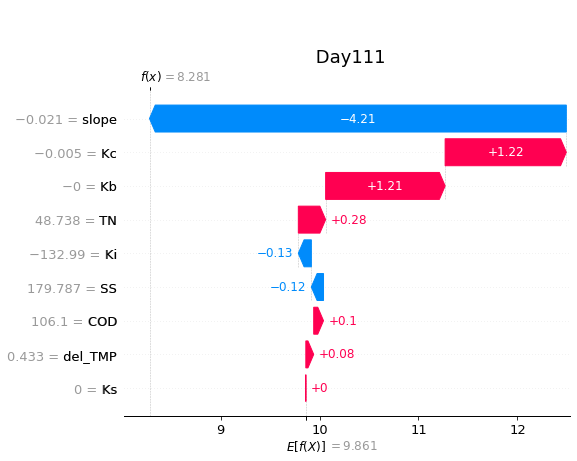

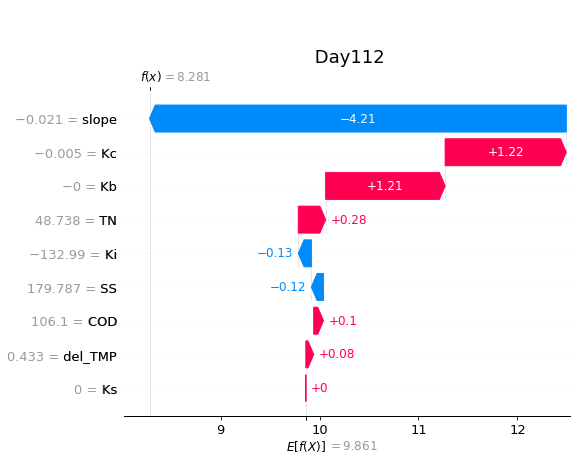

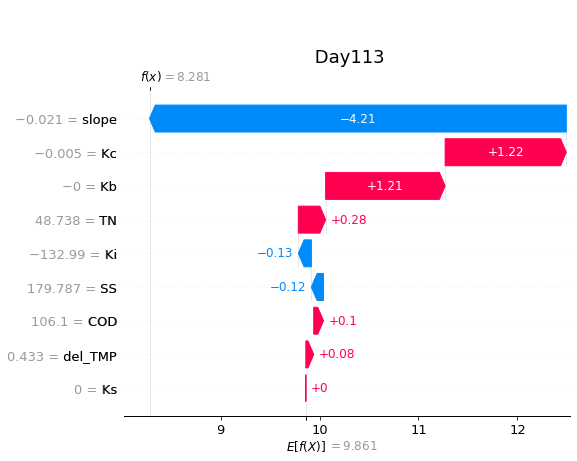

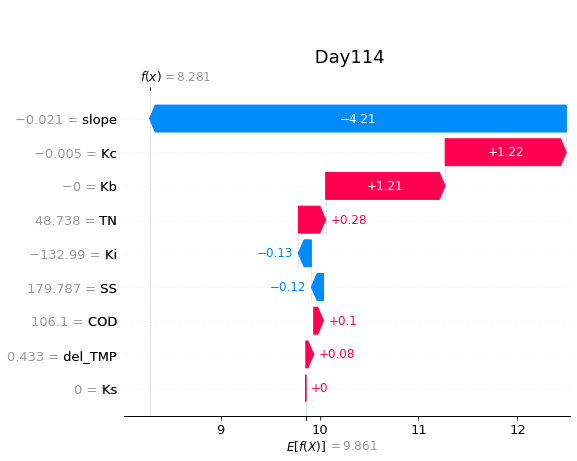

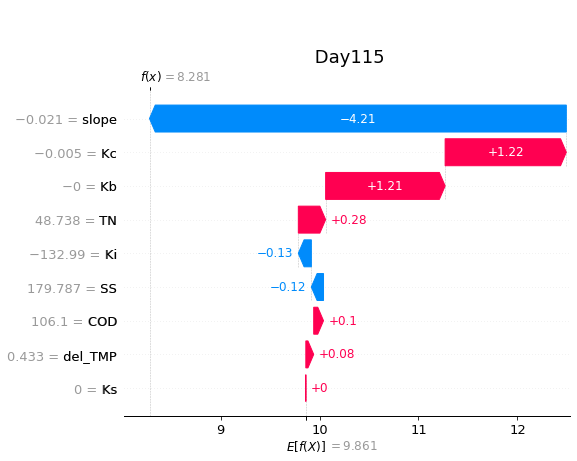

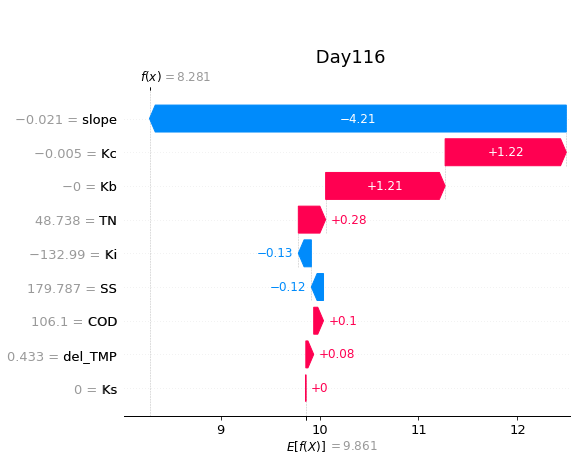

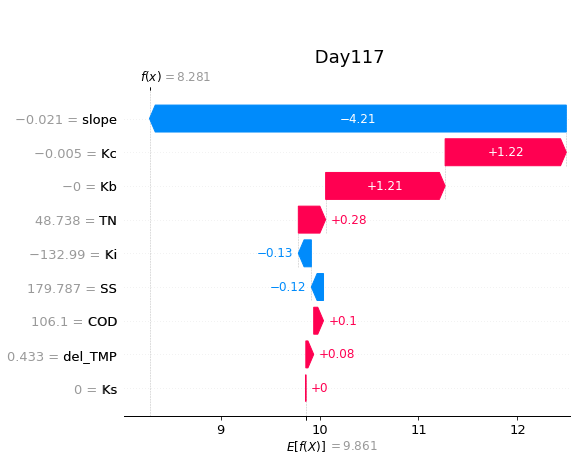

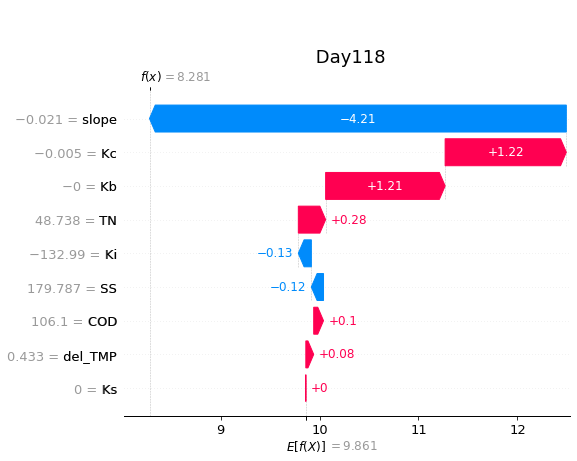

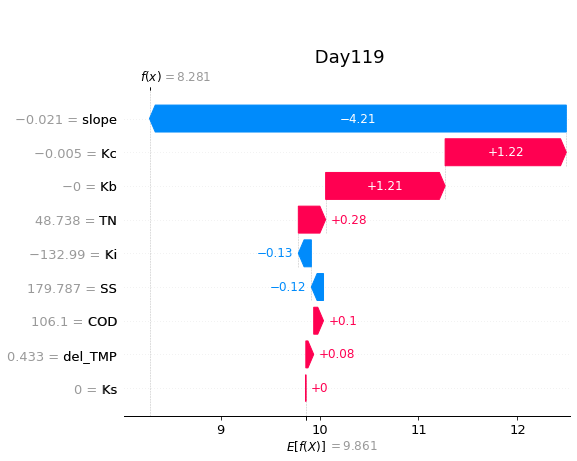

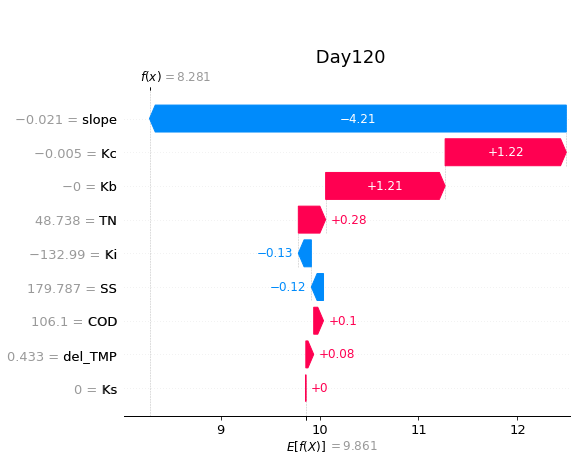

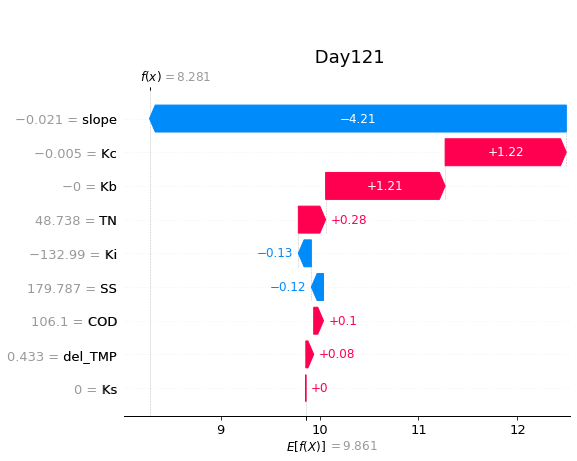

In [ ]:
import shap

# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)


# sample_ind = 18

target_range = len(X)

sample_ind = 1

# plt.figure(figsize=(35,50))
for i in range(2, target_range):
  target_X = X.iloc[0:i,:]
  target_y = y.iloc[0:i]
  shap_values = explainer(target_X)
  shap_val_waterfall = shap_values[sample_ind]
  shap_val_waterfall.base_values =shap_val_waterfall.base_values[0]
  
  if sample_ind <= 8:
    sample_ind +=1

  if i != 9:
    plt.title('\n\n Day'+str(i), fontsize=18)
    shap.plots.waterfall(shap_val_waterfall, max_display=9, show=True)


plt.show()

In [ ]:
X

Kb           Ki            Kc            Ks         COD  \
0    0.000000e+00     0.000000  0.000000e+00  2.539540e+00  111.280000   
1    2.150000e-08   529.635845  4.320790e-04  2.026410e-04  112.600000   
2    7.810000e-08  2092.434905  1.420000e-08  1.180000e-08  111.540000   
3   -1.590000e-08    -0.029619 -1.382392e-02  5.148340e-04  109.486667   
4   -1.430000e-07 -1679.369972 -2.806010e-04  8.190000e-05  107.206667   
..            ...          ...           ...           ...         ...   
117  5.740000e-08  1481.554599  7.960000e-09  1.310000e-08  109.020000   
118  4.200000e-08  5247.059677  4.690000e-09  1.250000e-08  108.753333   
119  1.220000e-08  3153.310664  1.190000e-08  7.145048e-03  104.906667   
120  5.570000e-09   817.161848  8.560000e-09  9.047860e-03  103.226667   
121  2.010000e-09  1206.304933  1.330000e-08  9.476401e-03  102.333333   

         TN          SS   del_TMP     slope  
0    49.012  175.560000  0.000000  0.000000  
1    49.296  177.560000  0.028759  0.014380  
2    49.190  174.006667  0.130550  0.053103  
3    48.826  169.786667 -0.412794 -0.063371  
4    48.880  169.560000 -0.260158 -0.102729  
..      ...         ...       ...       ...  
117  47.840  207.340000  1.436382  0.116912  
118  47.832  206.673333  0.783045  0.122510  
119  47.610  198.673333  0.521402  0.125834  
120  45.790  194.006667  0.146052  0.126001  
121  45.844  192.900000  0.029796  0.125212  

[122 rows x 9 columns]

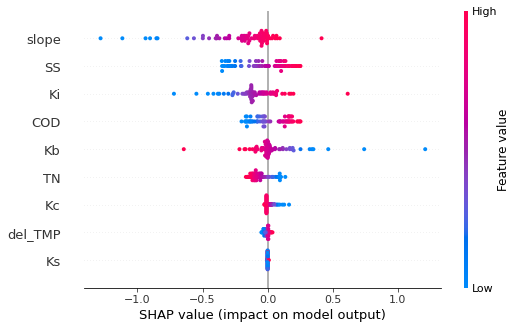

In [ ]:
import shap

# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)

# target_range = len(X)

# sample_ind = 18

# target_X = X.iloc[0:len(X),:]
# target_y = y.iloc[0:len(X)]
shap_values = explainer(target_X)
# shap_values = shap_values[sample_ind]
shap_values.base_values = shap_values.base_values[0]
  
# shap.plots.waterfall(shap_val_waterfall, max_display=9, show=False)
shap.summary_plot(shap_values, target_X)

plt.show()



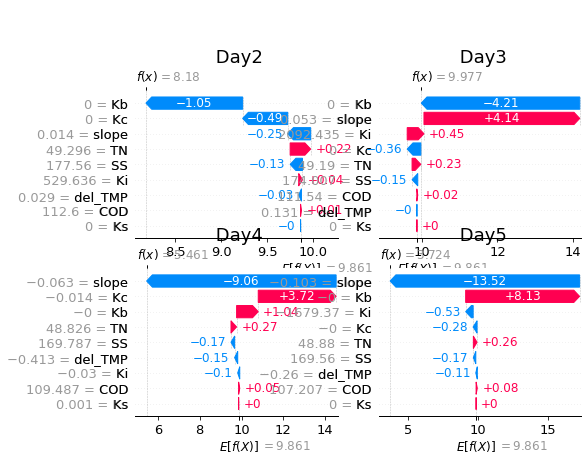

In [ ]:
import shap

# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)

target_range = 6 #len(X)

sample_ind = 1

# plt.figure(figsize=(35,50))
for i in range(2, target_range):
  target_X = X.iloc[0:i,:]
  target_y = y.iloc[0:i]
  shap_values = explainer(target_X)
  shap_val_waterfall = shap_values[sample_ind]
  shap_val_waterfall.base_values =shap_val_waterfall.base_values[0]
  
  if sample_ind <= 18:
    sample_ind +=1

  plt.subplot(2,2,i-1)
  plt.title('\n\n Day'+str(i), fontsize=18)
  shap.plots.waterfall(shap_val_waterfall, max_display=9, show=False)


plt.show()

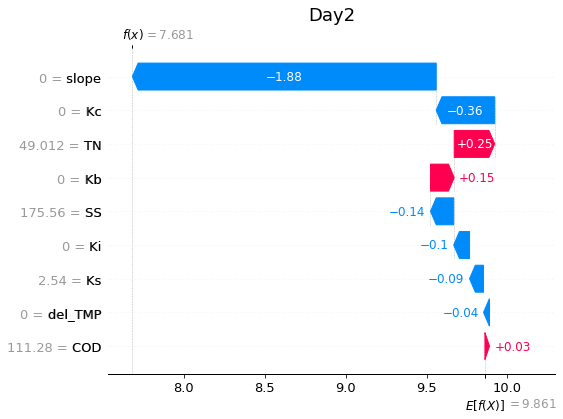

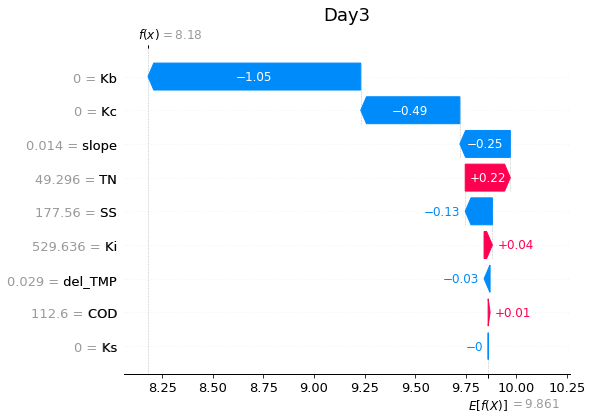

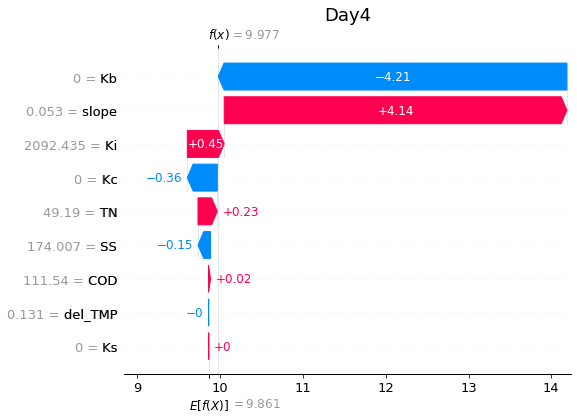

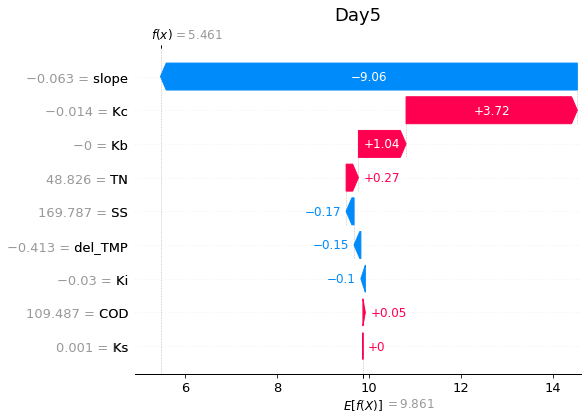

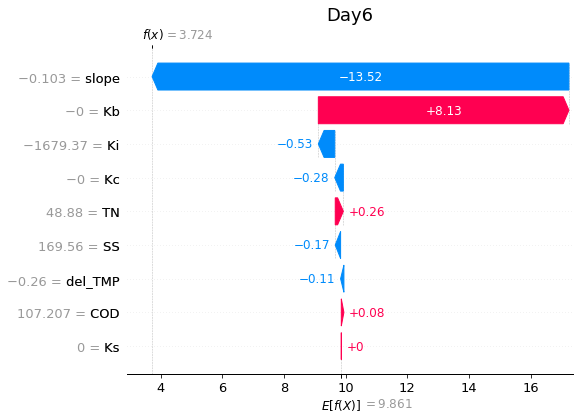

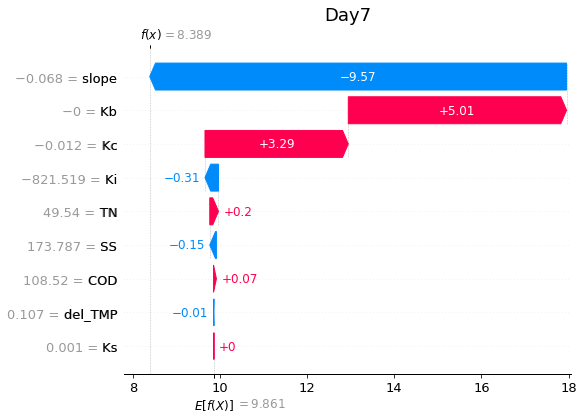

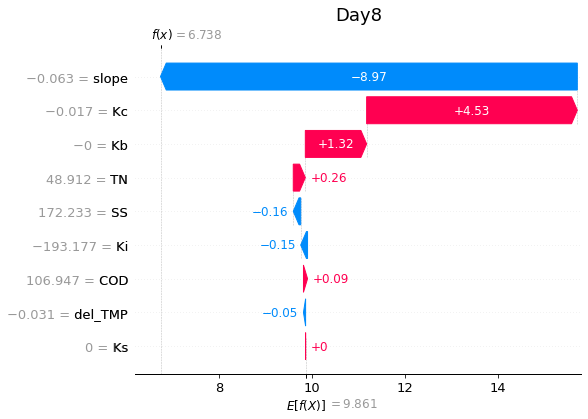

IndexError: ignored

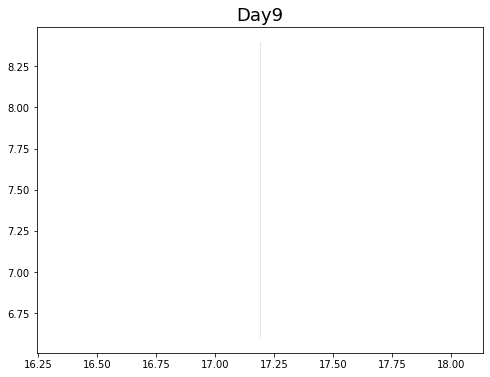

In [ ]:
import shap

# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
# shap_values = explainer(X)

target_range = 10 #len(X)
sample_ind = 0

for i in range(2, target_range):
  target_X = X.iloc[0:i,:]
  target_y = y.iloc[0:i]
  shap_values = explainer(target_X)
  shap_val_waterfall = shap_values[sample_ind]
  shap_val_waterfall.base_values =shap_val_waterfall.base_values[0]
  
  if sample_ind <= 18:
    sample_ind +=1

  plt.title('Day'+str(i), fontsize=18)
  shap.plots.waterfall(shap_val_waterfall, max_display=10, show=True)

plt.show()

In [ ]:
import shap

# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
# shap_values = explainer(X)

target_range = 10 #len(X)
sample_ind = 0

for i in range(2, target_range):
  target_X = X.iloc[0:i,:]
  target_y = y.iloc[0:i]
  shap_values = explainer(target_X)
  shap_val_waterfall = shap_values[sample_ind]
  shap_val_waterfall.base_values =shap_val_waterfall.base_values[0]
  
  if sample_ind <= 18:
    sample_ind +=1

  plt.title('Day'+str(i), fontsize=18)
  shap.plots.waterfall(shap_val_waterfall, max_display=10, show=True)

plt.show()

In [ ]:
import shap

# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
# shap_values = explainer(X)

target_range = len(X)
sample_ind = 1

for i in range(2, target_range):
  target_X = X.iloc[0:i,:]
  target_y = y.iloc[0:i]
  shap_values = explainer(target_X)
  shap_val_waterfall = shap_values[sample_ind]
  shap_val_waterfall.base_values =shap_val_waterfall.base_values[0]
  
  if sample_ind <= 18:
    sample_ind +=1

  plt.title('Day'+str(i), fontsize=18)
  shap.plots.waterfall(shap_val_waterfall, max_display=10, show=True)

  # plot_range = [10, 20, 30]
  
  # if i in plot_range:
    # plt.title('Day'+str(i), fontsize=18)
    # shap.plots.waterfall(shap_val_waterfall, max_display=6, show=True)

plt.show()